# Import needed libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data

In [3]:
# Load cleaned data from CSV file
products = pd.read_csv("cleanedProducts.csv", low_memory=False)

In [4]:
# Take a look at the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(products.shape)
products.head()

(253642, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
0,52,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:united-states,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,28 g (1 ONZ),28.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2243.0,2243.0,28.57,28.57,NaN,NaN,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,NaN,0.0,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,9.074776
1,53,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:united-states,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,28 g (0.25 cup),28.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941.0,1941.0,17.86,0.00,NaN,NaN,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.254000,NaN,0.0,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,9.074776
2,180,0000000032117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055667,2017-03-09T10:34:27Z,1489055668,2017-03-09T10:34:28Z,Tricolor Tortellini,NaN,NaN,NaN,napoleon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:united-states,"Egg pasta (refined durum semolina wheat flour,...",NaN,NaN,65 g (0.75 cup),65.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1611.0,1611.0,9.23,3.08,NaN,NaN,NaN,0.077,60.00,1.54,3.1,13.85,1.13284,0.453136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123,NaN,0.00166,NaN,NaN,NaN,NaN,NaN,9.074776
3,185,0000000033060,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055668,2017-03-09T10:34:28Z,1489055668,2017-03-09T10:34:28Z,10-Grain Pancake Mix,NaN,NaN,NaN,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:united-states,"Wheat, rye, triticale, oat, corn, barley, soy ...",NaN,NaN,58 g (0.5 cup),58.0,1.0,"en:e341,en:e341i",0.0,NaN,0.0,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297.0,1297.0,1.72,0.86,NaN,NaN,NaN,0.009,60.34,5.17,6.9,13.79,2.75844,1.103376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259,NaN,0.00248,NaN,NaN,NaN,NaN,NaN,9.074776
4,192,0000000033640,htt

# Focus on France

In [5]:
# Check NA values in origins and countries columns
print("Origins NA rate:\n", str(products['origins_tags'].isnull().mean() * 100)+" %")
print("Countries NA rate:\n", str(products['countries_tags'].isnull().mean() * 100)+" %")
print("\n")

# Check which country has the best nutriscore grade products
grades = products['nutriscore_grade'].unique()
grades = grades[pd.notna(grades)]
grades.sort()
for grade in grades:
    print("Top five countries relative frequencies with nutriscore grade " + grade + ": ")
    print(products[products['nutriscore_grade']==grade]['countries_tags'].value_counts(normalize=True)[0:5]*100)
    print("\n")
print("Top five countries relative frequencies with all nutriscore grades combined:")
print(products['countries_tags'].value_counts(normalize=True)[0:5]*100)
print("\n")

# Get subset of only products available in France
print("Shape of original dataframe: ", products.shape)
subset_fr = products[products['countries_tags'].str.contains("france", case=False) | products['countries_tags'].str.contains("french", case=False)]
print("Shape of subset limited to France: ",subset_fr.shape)


Origins NA rate:
 99.64556343192373 %
Countries NA rate:
 0.005519590604079766 %


Top five countries relative frequencies with nutriscore grade a: 
en:united-states              98.364687
en:france,en:united-states     0.603094
en:canada                      0.185567
en:france                      0.099743
en:spain,en:united-states      0.083505
Name: countries_tags, dtype: float64


Top five countries relative frequencies with nutriscore grade b: 
en:united-states              97.823955
en:france,en:united-states     0.852316
en:canada                      0.271534
en:spain,en:united-states      0.135767
en:france                      0.128224
Name: countries_tags, dtype: float64


Top five countries relative frequencies with nutriscore grade c: 
en:united-states              97.664126
en:france,en:united-states     1.133290
en:canada                      0.192235
en:france                      0.147529
en:spain,en:united-states      0.114000
Name: countries_tags, dtype: float64


To

# Global analysis

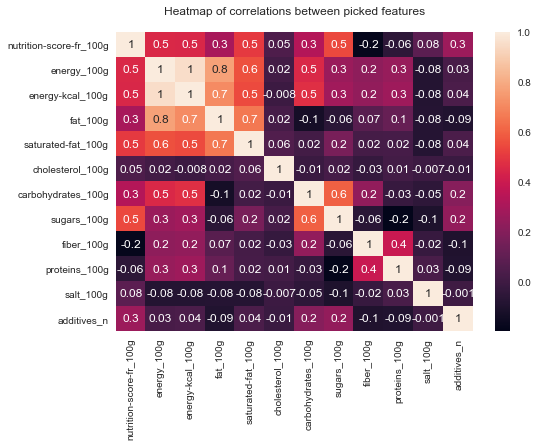

In [6]:
%matplotlib inline
sns.set()
plt.style.use('seaborn')
# Set appropriate colors map for color blindness 
plt.set_cmap('coolwarm')
ax = plt.axes()

# Plot heatmap of correlations between picked features
features = ['nutrition-score-fr_100g', 'energy_100g', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 
'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'additives_n']
df_feat = subset_fr[features]
plt.title('Heatmap of correlations between picked features\n')
sns.heatmap(df_feat.corr(), annot = True, fmt='.1g')
plt.show()

# Univariate analysis

Sugary snacks              28.558586
unknown                    22.355409
Cereals and potatoes       14.414144
Fat and sauces             10.158825
Beverages                   8.840276
Milk and dairy products     4.495055
Composite foods             3.685945
Salty snacks                3.026671
Fruits and vegetables       2.277495
Fish Meat Eggs              2.187594
Name: pnns_groups_1, dtype: float64


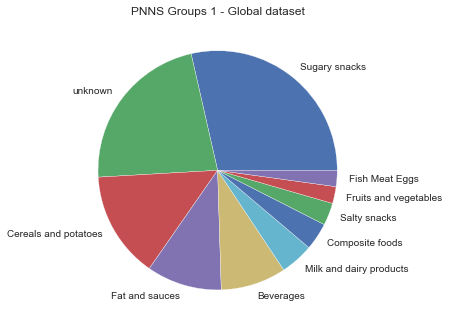

Cereals and potatoes       32.275132
unknown                    16.402116
Fruits and vegetables      12.698413
Milk and dairy products     9.788360
Fat and sauces              5.820106
Composite foods             5.555556
Fish Meat Eggs              5.026455
Sugary snacks               4.497354
Salty snacks                4.232804
Beverages                   3.703704
Name: pnns_groups_1, dtype: float64


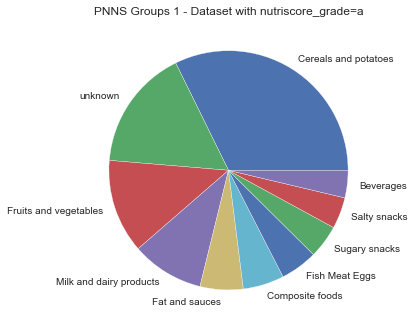

In [7]:
print(subset_fr['pnns_groups_1'].value_counts(normalize=True)*100)

# Pie plot of categories/groups
plt.axis('off')
subset_fr['pnns_groups_1'].value_counts(normalize=True).plot(kind='pie', title="PNNS Groups 1 - Global dataset")
#                                                              autopct='%.2f')
plt.show()

print(subset_fr[subset_fr['nutriscore_grade']=='a']['pnns_groups_1'].value_counts(normalize=True)*100)
plt.axis('off')
subset_fr[subset_fr['nutriscore_grade']=='a']['pnns_groups_1'].value_counts(normalize=True).plot(kind='pie',
                                                               title="PNNS Groups 1 - Dataset with nutriscore_grade=a")
#                                                              autopct='%.2f')
plt.show()


energy_100g
NA values: 0.0
mean:
 1430.509438221873
med:
 1586.0
std:
 793.7644536352798
mod:
 0    2092.0
dtype: float64


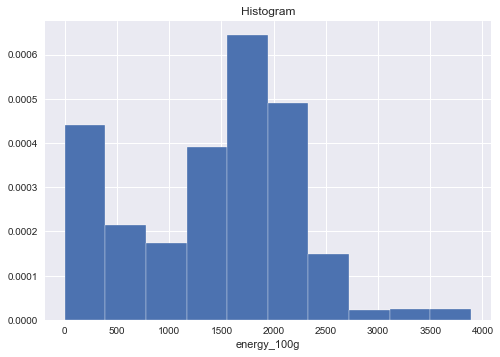

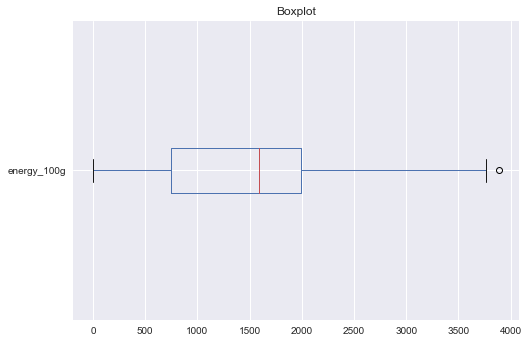

fat_100g
NA values: 0.0
mean:
 15.951111640132929
med:
 10.77
std:
 18.329928034848116
mod:
 0    0.0
dtype: float64


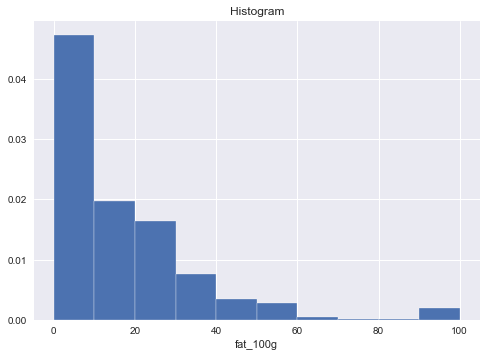

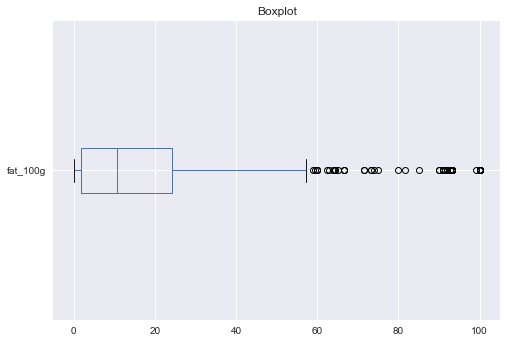

saturated-fat_100g
NA values: 0.0
mean:
 5.276074742170945
med:
 2.42
std:
 7.388443560193151
mod:
 0    0.0
dtype: float64


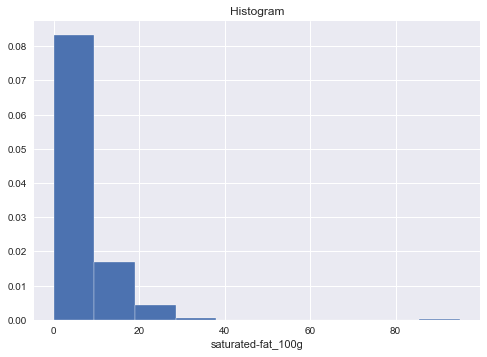

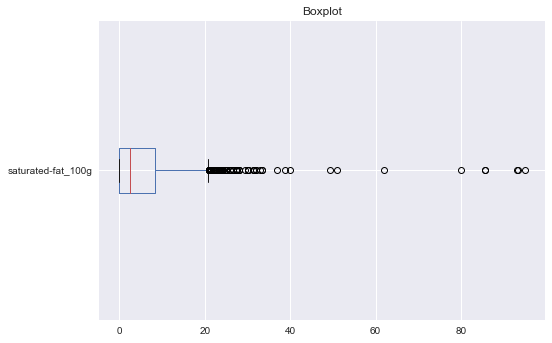

cholesterol_100g
NA values: 0.0
mean:
 0.014332595986822419
med:
 0.0
std:
 0.20216387146700088
mod:
 0    0.0
dtype: float64


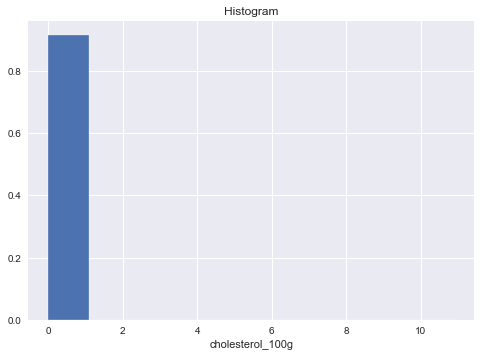

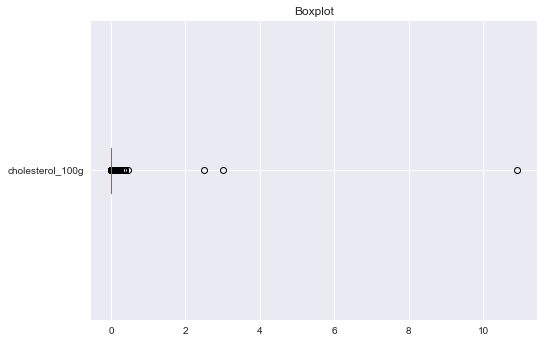

carbohydrates_100g
NA values: 0.0
mean:
 43.553968539287396
med:
 51.0
std:
 28.3108279771494
mod:
 0    0.0
dtype: float64


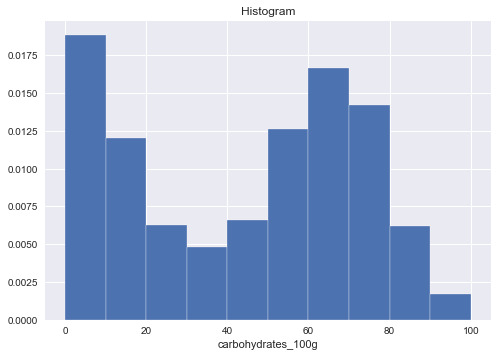

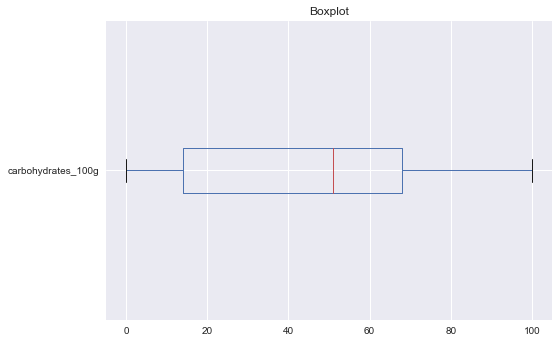

sugars_100g
NA values: 0.0
mean:
 19.089600329650732
med:
 11.18
std:
 19.776437858039763
mod:
 0    0.0
dtype: float64


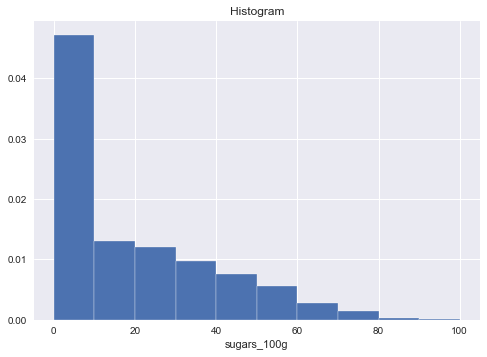

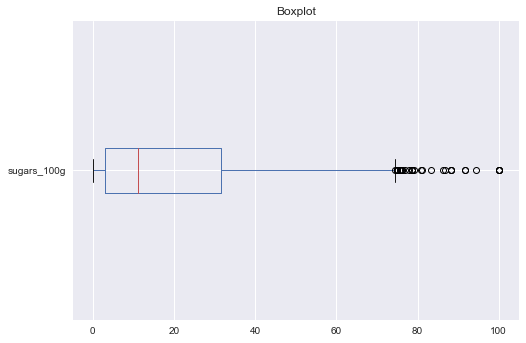

fiber_100g
NA values: 0.0
mean:
 3.9897777777777823
med:
 2.5
std:
 5.367896285866802
mod:
 0    0.0
dtype: float64


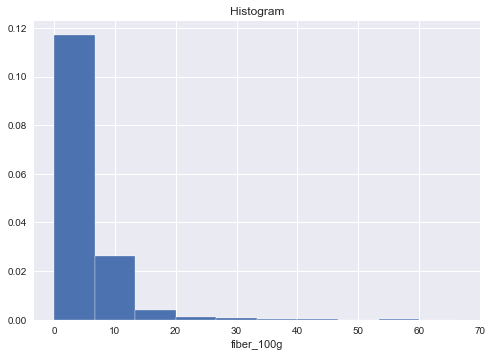

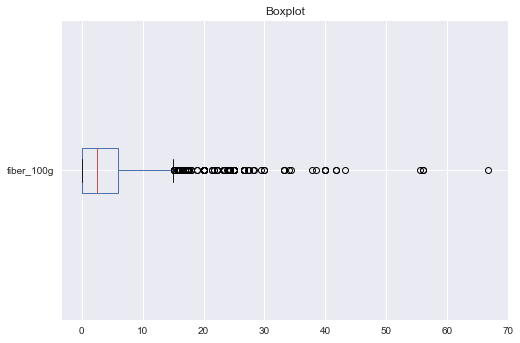

proteins_100g
NA values: 0.0
mean:
 8.359415496627227
med:
 6.51
std:
 9.075189257663558
mod:
 0    0.0
dtype: float64


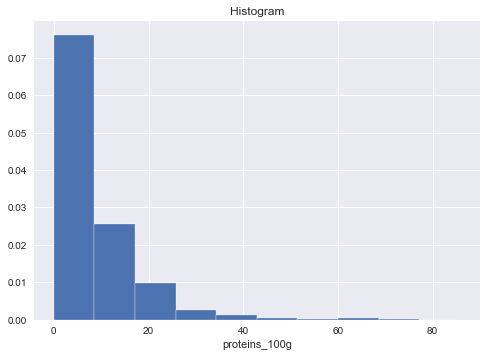

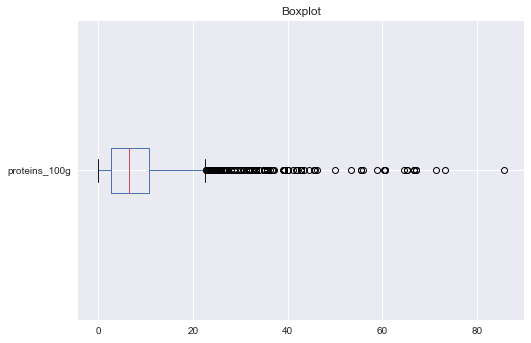

salt_100g
NA values: 0.0
mean:
 1.2202941877754019
med:
 0.6825
std:
 3.345038202555941
mod:
 0    0.0
dtype: float64


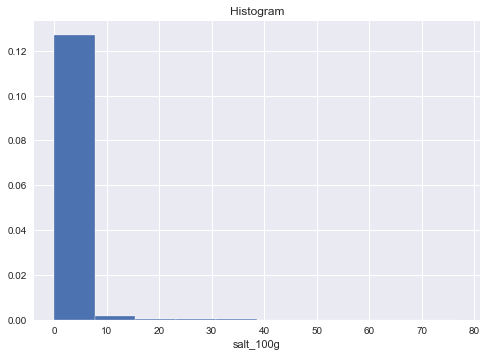

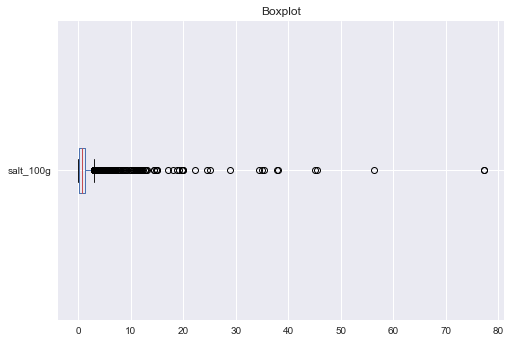

nutrition-score-fr_100g
NA values: 0.0
mean:
 10.887204513755249
med:
 11.0
std:
 8.395691922999594
mod:
 0    9.074776
dtype: float64


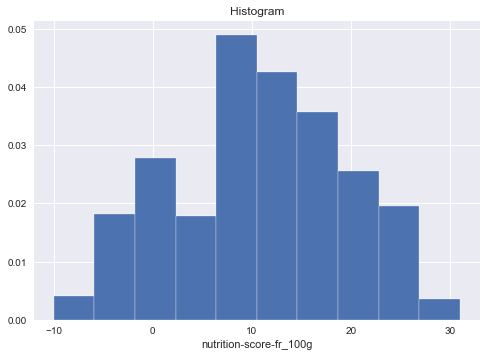

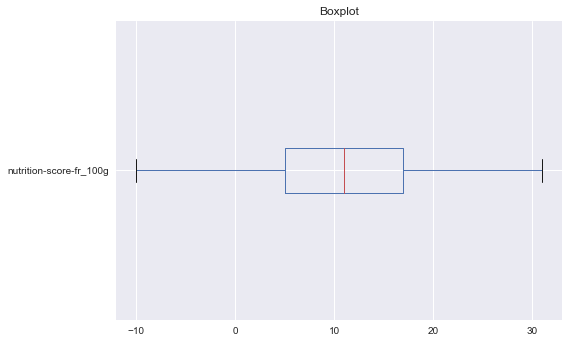

additives_n
NA values: 0.0
mean:
 2.0810230746836806
med:
 1.0
std:
 2.560939475456687
mod:
 0    0.0
dtype: float64


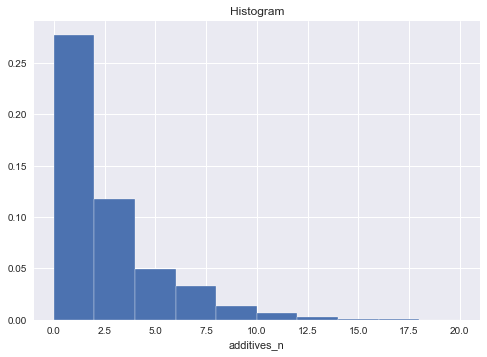

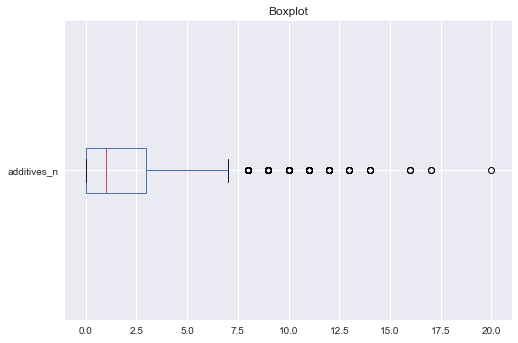

In [8]:
an_vars = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'additives_n']

for an_var in an_vars:
    print(an_var)
    print("NA values:",subset_fr[an_var].isnull().mean() * 100)
    print("mean:\n",subset_fr[an_var].mean())
    print("med:\n",subset_fr[an_var].median())
    print("std:\n",subset_fr[an_var].std(ddof=0))
    print("mod:\n",subset_fr[an_var].mode())
    subset_fr[an_var].hist(density=True)
    plt.title("Histogram")
    plt.xlabel(an_var)
    plt.show()
    plt.title("Boxplot")
    subset_fr.boxplot(column=an_var, vert=False)
    plt.show()


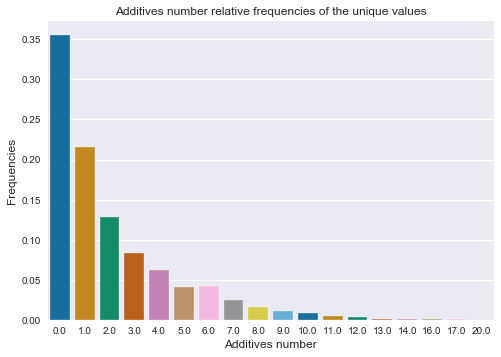

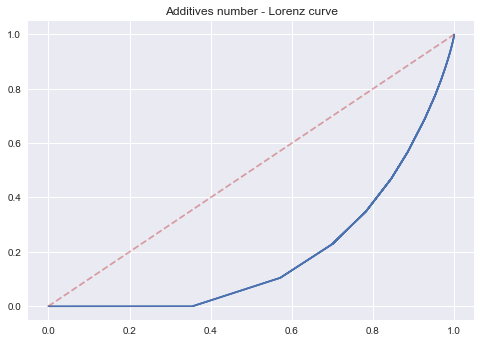

Gini coefficient of additives number:  0.6215061101232846


In [9]:
# Keep only the integer values of additives_n
subset_fr=subset_fr[subset_fr['additives_n']%1==0]

# Bar plot of additives number
addCounts = subset_fr['additives_n'].value_counts(normalize=True)
sns.barplot(addCounts.index, addCounts.values, order=addCounts.index.sort_values(), palette='colorblind') # alpha=0.8
addCounts.index = addCounts.index.sort_values()

plt.title('Additives number relative frequencies of the unique values')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Additives number', fontsize=12)
plt.show()

# Lorenz curve and Gini coefficient
addit = subset_fr['additives_n'].values  
lorenz = np.cumsum(np.sort(addit)) / addit.sum()
lorenz = np.append([0], lorenz)
plt.title('Additives number - Lorenz curve')
plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, drawstyle='steps-post')
plt.plot([0,1], [0,1], color='r', ls='--', alpha=0.5)
plt.show()

surface = lorenz[:-1].sum()/len(lorenz)
S = 0.5 - surface
gini_coeff = 2*S
print("Gini coefficient of additives number: ", gini_coeff)

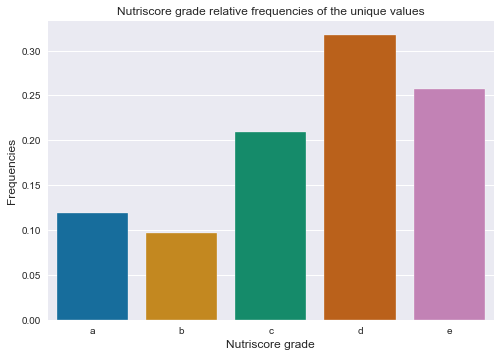

In [10]:
# Bar plot of nutriscore grades
nutrigradeCounts = subset_fr['nutriscore_grade'].value_counts(normalize=True)
sns.barplot(nutrigradeCounts.index, nutrigradeCounts.values, order=nutrigradeCounts.index.sort_values(), palette='colorblind') # alpha=0.8
plt.title('Nutriscore grade relative frequencies of the unique values')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Nutriscore grade', fontsize=12)
plt.show()

 # Analyse potential outliers

In [11]:
outliers_set = subset_fr[(subset_fr['energy_100g'] > 3800) ]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())
if outliers_set.shape[0] >= 1:
    print(outliers_set['energy_100g'].iloc[0])
    print(outliers_set['url'].iloc[0])

outliers_set.head()

(1, 84)
['Fat and sauces']
3887.0
http://world-en.openfoodfacts.org/product/0696859027390/chosen-foods-avocado-oil


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
180814,308003,0696859027390,http://world-en.openfoodfacts.org/product/0696...,usda-ndb-import,1489079421,2017-03-09T17:10:21Z,1585006434,2020-03-23T23:33:54Z,"Chosen Foods, Avocado Oil",NaN,NaN,NaN,chosen-foods,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:spain,en:united-states",Avocado oil.,NaN,NaN,14 g (1 Tbsp),14.0,0.0,NaN,0.0,NaN,0.0,NaN,11.0,d,2.0,Fat and sauces,Fats,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:vegetable-fats,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,3887.0,3887.0,100.0,14.29,71.43,14.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,11.0


In [12]:
# fat > 60g: oils, sauces and nuts (salty snacks)

outliers_set = subset_fr[(subset_fr['fat_100g'] > 60) & (subset_fr['fat_100g'] < 80)]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set = subset_fr[subset_fr['fat_100g'] > 80]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set = subset_fr[subset_fr['fat_100g'] > 60]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_fat = outliers_set[(outliers_set['pnns_groups_1'] == 'Fat and sauces') ]
print(outliers_fat.shape)
if outliers_fat.shape[0] >= 1:
    print(outliers_fat['fat_100g'].iloc[0])
    print(outliers_fat['url'].iloc[0])
display(outliers_fat.head())

outliers_salty = outliers_set[(outliers_set['pnns_groups_1'] == 'Salty snacks') ]
print(outliers_salty.shape)
if outliers_salty.shape[0] >= 1:
    print(outliers_salty['fat_100g'].iloc[0])
    print(outliers_salty['url'].iloc[0])

outliers_salty.head()

(16, 84)
['Fat and sauces' 'unknown' 'Salty snacks']
(63, 84)
['Fat and sauces' 'unknown']
(80, 84)
['Fat and sauces' 'Salty snacks' 'unknown']
(70, 84)
66.67
http://world-en.openfoodfacts.org/product/0041321005657/creamy-caesar-dressing-creamy-caesar


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
67835,94527,0041321005657,http://world-en.openfoodfacts.org/product/0041...,kiliweb,1537581003,2018-09-22T01:50:03Z,1587657478,2020-04-23T15:57:58Z,"Creamy caesar dressing, creamy caesar",NaN,NaN,NaN,NaN,"en:groceries,en:sauces,en:sauces-cesar",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Soybean oil, water, distilled vinegar, salt, p...","en:eggs,en:fish,en:gluten,en:milk,en:soybeans",NaN,2 Tbsp (30 ml),30.0,4.0,"en:e211,en:e385,en:e415,en:e621",0.0,NaN,0.0,NaN,26.0,e,4.0,Fat and sauces,Dressings and sauces,"en:to-be-completed,en:nutrition-facts-complete...",Pinnacle Foods Group LLC,en:sauces-cesar,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,2648.0,2648.0,66.67,10.00,16.67,36.67,0.0,0.0330,3.33,3.33,0.0,3.330,2.50,1.000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,26.0
74647,103669,0041498205072,http://world-en.openfoodfacts.org/product/0041...,openfoodfacts-contributors,1502675345,2017-08-14T01:49:05Z,1587674404,2020-04-23T20:40:04Z,"Coconut oil unrefined, cold-pressed virgin oil",NaN,NaN,NaN,simply-nature,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,en:organic,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states",Organic virgin coconut oil.,NaN,NaN,1 Tbsp (14 g),14.0,0.0,NaN,0.0,NaN,0.0,NaN,20.0,e,2.0,Fat and sauces,Fats,"en:to-be-completed,en:nutrition-facts-complete...",Aldi-Benner Company,en:vegetable-oils,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,3586.0,3586.0,100.00,85.71,NaN,NaN,0.0,0.0000,0.00,0.00,0.0,0.000,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20.0
89330,124559,0049568010328,http://world-en.openfoodfacts.org/product/0049...,usda-ndb-import,1489064349,2017-03-09T12:59:09Z,1587579287,2020-04-22T18:14:47Z,"Spread, original",NaN,NaN,NaN,"follow-your-heart,earth-island","en:groceries,en:sauces",NaN,NaN,"en:vegetarian,en:gluten-free,en:vegan,en:no-gm...",NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","(vegan, gluten-free, dairy-free, non-gmo): exp...",NaN,NaN,1 Tbsp (14 g),14.0,0.0,NaN,0.0,NaN,0.0,NaN,9.0,c,3.0,Fat and sauces,Dressings and sauces,"en:to-be-completed,en:nutrition-facts-complete...",Earth Island,en:sauces,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org

(5, 84)
80.0
http://world-en.openfoodfacts.org/product/0059764031645/margarine-omega-3-nuvel


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
96368,140698,0059764031645,http://world-en.openfoodfacts.org/product/0059...,cast46,1376871830,2013-08-19T00:23:50Z,1552302561,2019-03-11T11:09:21Z,Margarine Oméga 3,NaN,800 g,plastique,"nuvel,margarine-thibault-inc,margarine-thibault","en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,"en:vegetarian,en:kosher,en:no-artificial-flavo...",NaN,NaN,NaN,Canada,NaN,"en:canada,en:france","Huile de canola liquide 73.6 %, eau 16.0 %, hu...",en:soybeans,NaN,10 g / 2 c. à thé,10.0,4.0,"en:e160a,en:e160ai,en:e202,en:e322,en:e322i,en...",1.0,huile-de-palme,1.0,e160a-beta-carotene,11.0,d,4.0,Salty snacks,Salty and fatty products,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,en:margarines,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,2929.0,2929.0,80.00,10.00,NaN,2.00,0.0,0.00000,0.00,0.00,0.00,0.00,0.600,0.2400,NaN,0.00015,0.000012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,11.0
118513,177648,0072992053227,http://world-en.openfoodfacts.org/product/0072...,usda-ndb-import,1489140952,2017-03-10T10:15:52Z,1587633556,2020-04-23T09:19:16Z,Macadamias,NaN,NaN,NaN,hawaiian-host-inc,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Macadamia nuts, contains 2% or less of corn oi...",NaN,NaN,0.25 cup (28 g),28.0,1.0,en:e296,0.0,NaN,0.0,NaN,18.0,d,4.0,Salty snacks,Nuts,"en:to-be-completed,en:nutrition-facts-complete...",Hawaiian Host Inc.,en:macadamia-nuts,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,2987.0,2987.0,71.43,10.71,57.14,1.79,0.0,0.00000,14.29,3.57,7.10,7.14,1.340,0.5360,NaN,0.00000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00257,NaN,NaN,NaN,NaN,NaN,18.0
247400,417034,20003395,http://world-en.openfoodfacts.org/product/2000...,jeanbono,1372012116,2013-06-23T18:28:36Z,1587813691,2020-04-25T11:21:31Z,Noisettes en poudre,Poudre de noisettes,200g,"plastique,sachet","belbake,lidl","en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,"France,Nantes",Lidl,"en:france,en:germany,en:united-states",_Noisettes_ en poudre,en:nuts,en:nuts,2 Tbsp (32 g),32.0,0.0,NaN,0.0,NaN,0.0,NaN,-7.0,a,2.0,Salty snacks,Nuts,"en:to-be-checked,en

In [13]:
# saturated-fat between 20 and 30: cream and cheese and different categories;
# between 30 and 40: chocolate etc: sugary snacks mostly ;
# saturated-fat > 40: 'Fat and sauces'

outliers_set = subset_fr[(subset_fr['saturated-fat_100g'] > 20) & (subset_fr['saturated-fat_100g'] < 30) ]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set = subset_fr[(subset_fr['saturated-fat_100g'] > 30) & (subset_fr['saturated-fat_100g'] < 40) ]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set = subset_fr[subset_fr['saturated-fat_100g'] >  40]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())


(84, 84)
['unknown' 'Sugary snacks' 'Milk and dairy products' 'Fish Meat Eggs'
 'Beverages' 'Fat and sauces' 'Salty snacks' nan]
(10, 84)
['Sugary snacks' 'unknown']
(9, 84)
['Fat and sauces' 'unknown']


In [14]:
# cholesterol > 2: Sugary snacks and Noni puree

outliers_set = subset_fr[subset_fr['cholesterol_100g'] >  2]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())
outliers_set.head()

(3, 84)
['Sugary snacks' 'Fruits and vegetables']


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
181655,309587,0704039012156,http://world-en.openfoodfacts.org/product/0704...,kiliweb,1583360544,2020-03-04T22:22:24Z,1587636800,2020-04-23T10:13:20Z,"Glenfarclas, traditional fudge",NaN,NaN,NaN,NaN,"en:snacks,en:sweet-snacks,en:confectioneries",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Sugar, glucose syrup (from maize and wheat), s...","en:gluten,en:milk",NaN,40 g (40 g),40.0,0.0,NaN,0.0,NaN,0.0,NaN,18.0,d,4.0,Sugary snacks,Sweets,"en:to-be-completed,en:nutrition-facts-complete...",GLENFARCLAS,en:confectioneries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1674.000000,1674.0,7.5,6.5,NaN,NaN,2.5,2.5,75.0,55.0,2.5,2.5,0.0,0.00,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00045,NaN,NaN,NaN,NaN,NaN,18.0
248295,838680,3760150144340,http://world-en.openfoodfacts.org/product/3760...,phineas,1521746069,2018-03-22T19:14:29Z,1586466888,2020-04-09T21:14:48Z,Noni energy,Noni energy Noni & Honey,100 g,"gourde,plastique",noni-energy,"en:plant-based-foods-and-beverages,en:beverage...","amerique-du-sud,nouvelle-zelande,polynesie-fra...","polynesie-francaise,tahiti","en:100-natural,en:no-colorings,en:no-preservat...",NaN,NaN,NaN,"Polynésie Française,France,Nouvelle Zélande,Au...",NaN,"en:french-polynesia,en:new-zealand","Purée de noni, miel de cocotier, eau.",NaN,NaN,100 g,100.0,0.0,NaN,0.0,NaN,0.0,NaN,4.0,c,NaN,Fruits and vegetables,Fruits,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,en:energy-drinks,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,276.000000,276.0,0.0,0.0,NaN,NaN,0.0,3.0,16.0,7.0,1.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149,0.016,NaN,NaN,NaN,NaN,85.0,NaN,NaN,4.0
250023,1025906,5412038381481,http://world-en.openfoodfacts.org/product/5412...,openfoodfacts-contributors,1403288535,2014-06-20T18:22:15Z,1552919563,2019-03-18T14:32:43Z,Praliné Lait,Chocolat au lait fourré au praliné,138 g e (6 * 23 g),carton,galler,"en:snacks,en:sweet-snacks,en:chocolates,en:mil...",NaN,belgique,en:made-in-belgium,NaN,NaN,NaN,"France,Belgique",NaN,en:france,"chocolat : sucre, poudre de _lait_ entier, beu...","en:milk,en:nuts,en:soybeans","en:eggs,en:gluten,en:nuts",NaN,NaN,1.0,"en:e322,en:e322i",0.0,NaN,1.0,huile-vegetale,25.0,e,4.0,Sugary snacks,Chocolate products,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,en:filled-milk-chocolates,https://static.openfoodfacts.org/ima

In [15]:
# sugars > 80: sugary snacks and palm sugar etc
outliers_set = subset_fr[subset_fr['sugars_100g'] > 80]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set = subset_fr[subset_fr['sugars_100g'] > 95]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set.head()

(15, 84)
['unknown' 'Beverages' 'Sugary snacks']
(4, 84)
['unknown' 'Sugary snacks']


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
27249,40221,0022000159335,http://world-en.openfoodfacts.org/product/0022...,openfoodfacts-contributors,1385497779,2013-11-26T20:29:39Z,1575997032,2019-12-10T16:57:12Z,Altoids: Peppermint,Altoids,50 g,tin,altoids,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,en:verified,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","sugar, gum arabic, oil of peppermint, gelatin",NaN,NaN,2g,2.0,2.0,"en:e414,en:e428",0.0,NaN,0.0,NaN,10.0,c,4.0,unknown,unknown,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,en:mint-candies,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,42.0,42.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,100.0,0.0,0.0,0.000,0.00,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000,NaN,NaN,NaN,NaN,NaN,10.0
147791,217012,0084909003904,http://world-en.openfoodfacts.org/product/0084...,foodorigins,1438509519,2015-08-02T09:58:39Z,1587580835,2020-04-22T18:40:35Z,"Cock brand, palm sugar",NaN,454g,plastic,"cock-brand,marque-deposee","en:sweeteners,en:sugars,en:palm-sugar",thailand,thailand,NaN,NaN,NaN,NaN,"NSW,Australia","Aldi,Asian Supermarkets","en:australia,en:france,en:united-states",Palm sugar 100%,NaN,NaN,1 tsp (4 g),4.0,0.0,NaN,0.0,NaN,0.0,NaN,14.0,d,2.0,Sugary snacks,Sweets,"en:to-be-checked,en:complete,en:nutrition-fact...",Thai World Import & Export Co.,en:palm-sugar,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1569.0,1569.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,100.0,0.0,0.0,0.000,0.00,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.009,NaN,NaN,NaN,NaN,NaN,14.0
239868,391671,0873204001551,http://world-en.openfoodfacts.org/product/0873...,usda-ndb-import,1489143604,2017-03-10T11:00:04Z,1587635548,2020-04-23T09:52:28Z,Organic brown coconut sugar,NaN,NaN,NaN,bib-tree-farms-inc,"en:sweeteners,en:sugars",NaN,NaN,en:organic,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states",Certified organic fair trade granulated coconu...,NaN,NaN,1 tsp (4 g),4.0,0.0,NaN,0.0,NaN,0.0,NaN,14.0,d,NaN,Sugary snacks,Sweets,"en:to-be-completed,en:nutrition-facts-complete...","BIG TREE FARMS, INC.",en:sugars,https://static.openfoodfacts.org/images/produc...,https:/

In [16]:
# fibers > 40 it is either cereals or sugary snacks with nuts or ingredients with fibers
outliers_set = subset_fr[subset_fr['fiber_100g'] > 40]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())
display(outliers_set.head())

outliers_set = subset_fr[subset_fr['pnns_groups_1'] == 'Fruits and vegetables']
print(outliers_set.shape)
display(outliers_set[outliers_set['fiber_100g']==outliers_set['fiber_100g'].max()].head())
display(outliers_set[outliers_set['fiber_100g']==outliers_set['fiber_100g'].min()].head())


(7, 84)
['Cereals and potatoes' 'Sugary snacks' 'unknown']


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
96090,137969,0058449771036,http://world-en.openfoodfacts.org/product/0058...,usda-ndb-import,1489056354,2017-03-09T10:45:54Z,1587573784,2020-04-22T16:43:04Z,Cereal,NaN,NaN,NaN,nature-s-path,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Wheat bran*, oat fiber*, evaporated cane juice...",NaN,NaN,0.5 cup (30 g),30.0,0.0,NaN,0.0,NaN,0.0,NaN,6.0,c,3.0,Cereals and potatoes,Cereals,"en:to-be-completed,en:nutrition-facts-complete...",Nature's Path Foods Inc.,en:cereals-and-their-products,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,1117.0,1117.0,3.33,0.0,NaN,NaN,0.0,0.0,80.00,20.0,43.3,10.00,1.0825,0.433,NaN,0.0001,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067,NaN,0.00600,NaN,NaN,NaN,NaN,NaN,6.0
174899,299645,0669809200204,http://world-en.openfoodfacts.org/product/0669...,kiliweb,1578068082,2020-01-03T16:14:42Z,1587667007,2020-04-23T18:36:47Z,Berry sweet fish candy,NaN,NaN,NaN,NaN,"en:snacks,en:sweet-snacks,en:confectioneries",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Prebiotic soluble fiber from tapioca, pectin, ...",NaN,NaN,1 BAG (50 g),50.0,5.0,"en:e296,en:e330,en:e407,en:e440,en:e440i,en:e903",0.0,NaN,0.0,NaN,-2.0,a,4.0,Sugary snacks,Sweets,"en:to-be-completed,en:nutrition-facts-complete...",SMART SWEETS,en:confectioneries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669.0,669.0,0.00,0.0,NaN,NaN,0.0,0.0,70.00,6.0,56.0,0.00,0.4500,0.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020,0.000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,-2.0
174901,299647,0669809200402,http://world-en.openfoodfacts.org/product/0669...,kiliweb,1579666677,2020-01-22T04:17:57Z,1587667007,2020-04-23T18:36:47Z,"Berry, blue raspberry, lime, orange kick sugar...",NaN,NaN,NaN,NaN,"en:snacks,en:sweet-snacks,en:confectioneries",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Prebiotic soluble fiber from tapioca, lactic a...",NaN,NaN,1 BAG (50 g),50.0,7.0,"en:e270,en:e296,en:e297,en:e330,en:e407,en:e44...",0.0,NaN,0.0,NaN,-2.0,a,4.0,Sugary snacks,Sweets,"en:to-be-completed,en:nutrition-facts-complete...",SMART SWEETS,en:confectioneries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669.0,669.0,0.00,0.0,NaN,NaN,0.0,0.0,72.00,6.0,56.0,0.00,0.4000,0.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008,0.250,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,-2.0
180603,307709,0692752223297,http://world-en.openfoodfacts.org/product/0692...,kiliweb,1525418867,2018-05-04T07:27:47Z,1587655709,2020-04-23

(72, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
236076,386342,0858847000802,http://world-en.openfoodfacts.org/product/0858...,usda-ndb-import,1489060980,2017-03-09T12:03:00Z,1587577141,2020-04-22T17:39:01Z,Organic goji berries,NaN,113 g,"sachet,plastique,doypack",navitas,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,"en:organic,en:no-gmos,en:usda-organic",NaN,NaN,NaN,"France,États-Unis",NaN,"en:france,en:united-states",Certified organic goji berries (lycium barbarum),NaN,NaN,3 Tbsp (30 g),30.0,0.0,NaN,0.0,NaN,0.0,NaN,3.0,c,1.0,Fruits and vegetables,Dried fruits,"en:to-be-checked,en:complete,en:nutrition-fact...",NAVITAS ORGANICS,en:dried-goji,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1536.0,1536.0,0.0,0.0,NaN,NaN,0.0,0.0,76.67,43.33,13.3,13.33,1.3325,0.533,NaN,0.0075,NaN,0.0429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,0.077,NaN,0.01,NaN,NaN,NaN,NaN,NaN,3.0


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
209522,349639,0804531216202,http://world-en.openfoodfacts.org/product/0804...,usda-ndb-import,1489067512,2017-03-09T13:51:52Z,1587581309,2020-04-22T18:48:29Z,"Tag Brand, Banana And Tapioca Pearl In Coconut...",NaN,242 g,NaN,vara-food-drink-co-ltd,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,en:no-preservatives,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Coconut milk (coconut extract, water) water, b...",NaN,NaN,1 CAN (242 g),242.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,b,3.0,Fruits and vegetables,Fruits,"en:to-be-completed,en:nutrition-facts-complete...",TAG BRAND,en:canned-fruits,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,397.0,397.0,4.13,3.72,NaN,NaN,0.0,0.000,13.22,8.68,0.0,1.24,0.0100,0.004,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
252918,1346952,8801047182634,http://world-en.openfoodfacts.org/product/8801...,usda-ndb-import,1489065992,2017-03-09T13:26:32Z,1587580362,2020-04-22T18:32:42Z,"Dong won, sesame leaves, mild",NaN,NaN,NaN,dong-won,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Pickled sesame leaves, mixed soy sauce (defatt...",NaN,NaN,2.47 ONZ (70 g),70.0,1.0,en:e1510,0.0,NaN,0.0,NaN,-3.0,a,4.0,Fruits and vegetables,Vegetables,"en:to-be-completed,en:nutrition-facts-complete...",DONG WON,en:canned-vegetables,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,418.0,418.0,2.14,0.00,NaN,NaN,0.0,0.036,15.71,0.00,0.0,4.29,0.8925,0.357,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-3.0


In [17]:
# proteins > 50: ingredients are of a  high amount of proteins like beverages
outliers_set = subset_fr[subset_fr['proteins_100g'] > 50]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_cereals = outliers_set[outliers_set['pnns_groups_1'] == 'Cereals and potatoes']
print(outliers_cereals.shape)
display(outliers_cereals.head())

outliers_bev = outliers_set[outliers_set['pnns_groups_1'] == 'Beverages']
print(outliers_bev.shape)
display(outliers_bev.head())

# Yeasts mostly
outliers_unk = outliers_set[outliers_set['pnns_groups_1'] == 'unknown']
print(outliers_unk.shape)
display(outliers_unk.head())

outliers_set = subset_fr[subset_fr['pnns_groups_1'] == 'Milk and dairy products']
print(outliers_set.shape)
print("Max and Min of proteins in Milk and dairy products:")
display(outliers_set[outliers_set['proteins_100g']==outliers_set['proteins_100g'].max()].head())
display(outliers_set[outliers_set['proteins_100g']==outliers_set['proteins_100g'].min()].head())

outliers_set = subset_fr[subset_fr['pnns_groups_1'] == 'Fish Meat Eggs']
print(outliers_set.shape)
print("Max and Min of proteins in Fish Meat Eggs:")
display(outliers_set[outliers_set['proteins_100g']==outliers_set['proteins_100g'].max()].head())
display(outliers_set[outliers_set['proteins_100g']==outliers_set['proteins_100g'].min()].head())

(19, 84)
['unknown' 'Beverages' 'Cereals and potatoes']
(1, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
252521,1239461,8422584017069,http://world-en.openfoodfacts.org/product/8422...,javichu,1416845962,2014-11-24T16:19:22Z,1584888488,2020-03-22T14:48:08Z,Milanesas de Soja,Milanesas de soja texturizada,125 g,bolsa-de-plastico,el-granero-integral,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,"en:vegetarian,en:vegan,en:no-gmos","fabricante-y-envasador,desconocido,distribuido...",NaN,NaN,"Madrid,España",NaN,"en:france,en:spain",Harina de soja (parcialmente desgrasada y text...,NaN,"en:gluten,en:milk,en:nuts,en:sesame-seeds",NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,b,1.0,Cereals and potatoes,Legumes,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,es:soja-y-derivados,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1439.0,1439.0,0.9,0.1,NaN,NaN,NaN,0.0,28.0,12.0,1.8,56.0,0.3,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


(16, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
173962,297773,0658010122368,http://world-en.openfoodfacts.org/product/0658...,gailet,1538869445,2018-10-06T23:44:05Z,1587664487,2020-04-23T17:54:47Z,Chocolate organic plant-based delicious protei...,NaN,544g.,plastic-jar,garden-of-lif,"en:beverages,en:dietary-supplements,en:bodybui...",usa-and-other-unspecified-countries,usa,"en:organic,en:vegetarian,en:no-gmos,en:vegan,e...",eopcl-122117,NaN,NaN,USA,Walgreens,"en:france,en:united-states","Organic protein blend: organic pea protein, or...",NaN,"en:eggs,en:milk,en:nuts,en:soybeans,fr:mm",1 SCOOP (30 g),30.0,5.0,"en:e1101,en:e1104,en:e410,en:e412,en:e968",0.0,NaN,0.0,NaN,12.0,e,4.0,Beverages,Artificially sweetened beverages,"en:to-be-completed,en:nutrition-facts-complete...","Garden of Life, Inc.",en:protein-shakes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,1674.0,1674.0,8.33,0.00,1.67,3.33,0.0,0.000,16.67,0.00,13.3,66.67,1.6675,0.667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157,0.133,NaN,0.02000,0.050,0.00933,NaN,NaN,NaN,12.000000
174359,298454,0660726534212,http://world-en.openfoodfacts.org/product/0660...,jimklaver,1477840451,2016-10-30T15:14:11Z,1587657026,2020-04-23T15:50:26Z,"Muscle milk, pro series protein powder, knocko...",NaN,907 g,NaN,NaN,en:beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meijer,"en:france,en:united-states","Milk protein isolate, calcium sodium caseinate...",en:milk,NaN,2 SCOOPS (53 g),53.0,5.0,"en:e306,en:e322,en:e322i,en:e471,en:e950,en:e955",0.0,NaN,0.0,NaN,16.0,e,4.0,Beverages,Artificially sweetened beverages,"en:to-be-completed,en:nutrition-facts-complete...","CytoSport, Inc.",en:beverages,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,1657.0,1657.0,6.60,2.83,1.89,0.00,0.0,0.066,22.64,3.77,1.9,60.38,0.6125,0.245,NaN,0.000566,NaN,0.0226,0.001,0.000642,0.007547,0.000755,NaN,0.000151,0.000002,0.981,0.755,0.566,0.00679,0.151,0.00566,NaN,NaN,NaN,16.000000
209825,350086,0805974204306,http://world-en.openfoodfacts.org/product/0805...,kiliweb,1518806800,2018-02-16T18:46:40Z,1587673480,2020-04-23T20:24:40Z,"Super serum protein, natural vanilla",NaN,NaN,NaN,paleoethics,"en:beverages,en:dried-products,en:dried-produc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Hydrolyzed beef protein, serum albumin concent...",NaN,NaN,21 g (21 g),21.0,1.0,en:e960,0.0,NaN,0.0,NaN,NaN,NaN,4.0,Beverages,Artificially sweetened beverages,"en:to-be-completed,en:nutrition-facts-complete...",PALEOETHICS,en:dehydrated-beverages,NaN,NaN,NaN,NaN,NaN,NaN,N

(2, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
55092,78283,0039978005465,http://world-en.openfoodfacts.org/product/0039...,usda-ndb-import,1489094131,2017-03-09T21:15:31Z,1587593472,2020-04-22T22:11:12Z,Large flake nutritional yeast,NaN,8 oz,NaN,bob-s-red-mill,en:cooking-helpers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Inactive nutritional yeast [dried yeast, niaci...",NaN,NaN,1/4 cup (15 g),15.0,0.0,NaN,0.0,NaN,0.0,NaN,-5.0,a,1.0,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...","Bob's Red Mill Natural Foods, Inc.",en:cooking-helpers,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,1674.0,1674.0,3.33,0.0,NaN,NaN,0.0,0.0,33.33,0.0,20.0,53.33,0.4175,0.167,NaN,0.0,NaN,0.0,0.079,0.064600,0.306667,0.040000,NaN,0.0072,0.000116,NaN,0.000,NaN,0.00480,NaN,NaN,NaN,NaN,NaN,-5.0
123424,184384,0074305066054,http://world-en.openfoodfacts.org/product/0074...,usda-ndb-import,1489062173,2017-03-09T12:22:53Z,1587577894,2020-04-22T17:51:34Z,Nutritional yeast seasoning,NaN,NaN,NaN,bragg,"en:groceries,en:condiments,en:cooking-helpers,...",NaN,NaN,en:gluten-free,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Inactive dry yeast, pyridoxine hydrochloride (...",NaN,NaN,1 Tbsp (9 g),9.0,0.0,NaN,0.0,NaN,0.0,NaN,-4.0,a,1.0,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...",BRAGG,en:seasonings,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1582.0,1582.0,0.00,0.0,NaN,NaN,NaN,0.0,33.33,0.0,22.2,55.56,0.5000,0.200,NaN,NaN,NaN,NaN,0.078,0.082356,0.437778,0.084667,0.00016,NaN,0.000375,2.1,0.056,NaN,0.01111,NaN,0.018,NaN,NaN,NaN,-4.0


(147, 84)
Max and Min of proteins in Milk and dairy products:


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
242699,395530,0886926844399,http://world-en.openfoodfacts.org/product/0886...,openfoodfacts-contributors,1478472658,2016-11-06T22:50:58Z,1587575198,2020-04-22T17:06:38Z,"Grated parmesan romano & asiago cheese, parmes...",NaN,8 oz (226g),"plastic,box",meijer,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,NaN,NaN,NaN,NaN,NaN,"Michigan,USA",Meijer,"en:france,en:united-states","Parmesan cheese (pasteurized part skim milk, c...",NaN,en:milk,2 tsp (5g),5.0,1.0,"en:e460,en:e460ii",0.0,NaN,0.0,NaN,19.0,e,4.0,Milk and dairy products,Cheese,"en:to-be-checked,en:complete,en:nutrition-fact...","Meijer, Inc.",en:grated-cheese,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1674.0,1674.0,30.0,20.0,NaN,NaN,0.0,0.1,0.0,0.0,0.0,40.0,4.5,1.8,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,19.0


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
74259,103159,0041498151553,http://world-en.openfoodfacts.org/product/0041...,kiliweb,1577710274,2019-12-30T12:51:14Z,1587667311,2020-04-23T18:41:51Z,"Rich & creamy heavy whipping cream, rich & creamy",NaN,NaN,NaN,aldi,"en:dairies,en:creams",NaN,NaN,en:gluten-free,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Heavy cream milk, contains less than 0.5% of: ...",NaN,NaN,1 Tbsp (15 ml),15.0,3.0,"en:e407,en:e433,en:e471",0.0,NaN,1.0,e433-monooleate-de-polyoxyethylene-de-sorbitane,14.0,d,4.0,Milk and dairy products,Milk and yogurt,"en:to-be-completed,en:nutrition-facts-complete...",Aldi-Benner Company,en:creams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1393.0,1393.0,33.33,23.33,NaN,NaN,0.0,0.133,6.67,0.00,0.0,0.0,0.0825,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,14.0
82088,114095,0043000204337,http://world-en.openfoodfacts.org/product/0043...,stephane,1441263361,2015-09-03T06:56:01Z,1581126999,2020-02-08T01:56:39Z,Jell-o vanille,Instant Pudding & Pie Filling,96 g,card,jell-o,"en:dairies,en:desserts,en:dairy-desserts,en:pu...",NaN,NaN,en:kosher,NaN,NaN,NaN,"New York,United States",NaN,"en:france,en:united-states","sugar, modified corn starch, contains less tha...",NaN,NaN,25 g,25.0,6.0,"en:e102,en:e110,en:e320,en:e339,en:e339ii,en:e...",0.0,NaN,0.0,NaN,20.0,e,4.0,Milk and dairy products,Dairy desserts,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,fr:desserts-lactes-a-la-vanille,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1506.0,1506.0,0.00,0.00,NaN,NaN,0.0,0.000,92.00,76.00,0.0,0.0,1.4000,0.560,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20.0
109928,166203,0071448505167,http://world-en.openfoodfacts.org/product/0071...,openfoodfacts-contributors,1560597301,2019-06-15T11:15:01Z,1587646093,2020-04-23T12:48:13Z,Soft ripened cheese,NaN,227g,NaN,ile-de-france,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Pasteurized milk, salt, lactic starters, anima...",NaN,NaN,1 ONZ (28 g),28.0,0.0,NaN,0.0,NaN,0.0,NaN,19.0,e,3.0,Milk and dairy products,Cheese,"en:to-be-completed,en:nutrition-facts-complete...",ILE DE FRANCE,en:camemberts-de-normandie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1197.0,1197.0,21.43,14.29,NaN,NaN,0.0,0.061,0.00,0.00,0.0,0.0,1.4275,0.571,NaN,0.000321,NaN,0.0,NaN,NaN,

(68, 84)
Max and Min of proteins in Fish Meat Eggs:


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
17027,26592,0017082876317,http://world-en.openfoodfacts.org/product/0017...,usda-ndb-import,1489064228,2017-03-09T12:57:08Z,1587579206,2020-04-22T18:13:26Z,"Jack link's, meat snacks, beef jerky, original",NaN,NaN,NaN,jack-link-s,"en:snacks,en:meats,en:dried-meats,en:beef-jerkies",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Beef, water, sugar, salt, less than 2% soy sau...","en:gluten,en:soybeans",NaN,1 ONZ (28 g),28.0,1.0,en:e330,0.0,NaN,0.0,NaN,16.0,d,4.0,Fish Meat Eggs,Meat,"en:to-be-completed,en:nutrition-facts-complete...","Link Snacks, Inc.",en:beef-jerkies,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,1197.0,1197.0,3.57,0.0,NaN,NaN,0.0,0.107,17.86,14.29,0.0,42.86,5.2675,2.107,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00386,NaN,NaN,NaN,NaN,NaN,16.0
17057,26628,0017082877628,http://world-en.openfoodfacts.org/product/0017...,kiliweb,1528102273,2018-06-04T08:51:13Z,1587640581,2020-04-23T11:16:21Z,Beef jerky meat snacks,NaN,NaN,NaN,jack-link-s,"en:snacks,en:meats,en:dried-meats,en:beef-jerkies",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Beef, water, sugar, salt, less than 2% soy sau...","en:gluten,en:soybeans",NaN,1 ONZ (28 g),28.0,1.0,en:e330,0.0,NaN,0.0,NaN,16.0,d,4.0,Fish Meat Eggs,Meat,"en:to-be-completed,en:nutrition-facts-complete...","Link Snacks, Inc.",en:beef-jerkies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1197.0,1197.0,3.57,0.0,NaN,NaN,0.0,0.107,17.86,14.29,0.0,42.86,5.2675,2.107,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00386,NaN,NaN,NaN,NaN,NaN,16.0
17061,26633,0017082877727,http://world-en.openfoodfacts.org/product/0017...,kiliweb,1523735723,2018-04-14T19:55:23Z,1587659441,2020-04-23T16:30:41Z,Beef jerky meat snacks,NaN,NaN,NaN,NaN,"en:snacks,en:meats,en:dried-meats,en:beef-jerkies",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Beef, water, sugar, salt, less than 2% soy sau...","en:gluten,en:soybeans",NaN,1 ONZ (28 g),28.0,1.0,en:e330,0.0,NaN,0.0,NaN,16.0,d,4.0,Fish Meat Eggs,Meat,"en:to-be-completed,en:nutrition-facts-complete...","Link Snacks, Inc.",en:beef-jerkies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1197.0,1197.0,3.57,0.0,NaN,NaN,0.0,0.107,17.86,14.29,0.0,42.86,5.2675,2.107,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00386,NaN,NaN,NaN,NaN,NaN,16.0
226247,373290,0852390019670,http://world-en.openfoodfacts.org/product/0852...,kiliweb,1553535257,2019-03-25T17:34:17Z,1587640564,2020-04-23T11:16:04Z,"Teriyaki beef jerky, teriyaki",NaN,NaN,NaN,NaN,"en:snacks,en:meats,en:dried-meats,en:beef-jerkies",N

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
101808,154817,0070303022320,http://world-en.openfoodfacts.org/product/0070...,usda-ndb-import,1489061610,2017-03-09T12:13:30Z,1587577572,2020-04-22T17:46:12Z,Flat fillets of anchovies in olive oil,NaN,NaN,NaN,season-brand,"en:canned-foods,en:seafood",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Anchovies (fish), olive oil, salt.",en:fish,NaN,0.5 ONZ (15 g),15.0,0.0,NaN,0.0,NaN,0.0,NaN,12.0,d,3.0,Fish Meat Eggs,Fish and seafood,"en:to-be-completed,en:nutrition-facts-complete...","I. Epstein & Sons, Inc.",en:seafood,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,699.0,699.0,6.67,0.0,NaN,NaN,0.0,0.107,0.0,0.0,0.0,0.0,14.3325,5.733,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267,NaN,0.0024,NaN,NaN,NaN,NaN,NaN,12.0


In [18]:
# salt > 40, mainly in 'Composite foods (soups) and seasoning
outliers_set = subset_fr[subset_fr['salt_100g'] > 10]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set = subset_fr[subset_fr['salt_100g'] > 40]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_set.head()

(48, 84)
['Cereals and potatoes' 'unknown' 'Fat and sauces' 'Composite foods'
 'Sugary snacks' 'Fish Meat Eggs']
(5, 84)
['unknown' 'Composite foods']


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
93440,131130,0052100038285,http://world-en.openfoodfacts.org/product/0052...,kiliweb,1532863617,2018-07-29T11:26:57Z,1588730301,2020-05-06T01:58:21Z,"Montreal steak seasoning, montreal steak",NaN,NaN,NaN,NaN,"en:groceries,en:condiments",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","coarse salt, spices (including black pepper an...",NaN,NaN,1/4 tsp (0.8 g),0.8,0.0,NaN,0.0,NaN,0.0,NaN,10.0,c,3.0,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...","McCormick & Company, Inc.",en:condiments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,56.2500,22.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.000000
111976,169161,0071998000013,http://world-en.openfoodfacts.org/product/0071...,usda-ndb-import,1489057230,2017-03-09T11:00:30Z,1587574411,2020-04-22T16:53:31Z,"Original creole seasoning, original",NaN,227 g,NaN,tony-chachere-s,"en:groceries,en:condiments,en:seasonings",united-states,NaN,"en:no-flavour-enhancer,en:no-msg",NaN,NaN,NaN,United States,NaN,"en:france,en:united-states","Salt, dried red chili pepper, black pepper, ch...",NaN,"en:gluten,en:milk,en:soybeans",0.25 tsp (1.1 g),1.1,0.0,NaN,0.0,NaN,0.0,NaN,10.0,c,3.0,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...","Tony Chachere's Creole Foods of Opelousas, Inc.",en:seasonings,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,77.2725,30.909,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.000000
111977,169162,0071998000051,http://world-en.openfoodfacts.org/product/0071...,usda-ndb-import,1489143868,2017-03-10T11:04:28Z,1589842623,2020-05-18T22:57:03Z,"Original creole seasoning, original",NaN,NaN,NaN,"tony-chachere-s,tony-chachere-s-creole-foods-o...","en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","salt, dried red chili pepper, black pepper, ch...",NaN,NaN,0.25 tsp (1.1 g),1.1,0.0,NaN,0.0,NaN,0.0,NaN,10.0,c,3.0,unknown,unknown,"en:to-be-completed,en:nutrition-facts-complete...","Tony Chachere's Creole Foods of Opelousas, Inc.",en:condiments,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,

In [19]:
# additives_n
outliers_set = subset_fr[subset_fr['additives_n'] > 7]
print(outliers_set.shape)
print(outliers_set['pnns_groups_1'].unique())

outliers_fag = outliers_set[outliers_set['pnns_groups_1'] == 'Fruits and vegetables']
print(outliers_fag.shape)
display(outliers_fag.head())

outliers_milk = outliers_set[outliers_set['pnns_groups_1'] == 'Milk and dairy products']
print(outliers_milk.shape)
display(outliers_milk.head())

outliers_cer = outliers_set[outliers_set['pnns_groups_1'] == 'Cereals and potatoes']
print(outliers_cer.shape)
display(outliers_cer.head())

(154, 84)
['Sugary snacks' 'Beverages' 'unknown' 'Cereals and potatoes'
 'Salty snacks' 'Fruits and vegetables' 'Fat and sauces' 'Composite foods'
 'Milk and dairy products']
(2, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
34965,51525,0028989971951,http://world-en.openfoodfacts.org/product/0028...,kiliweb,1555712181,2019-04-19T22:16:21Z,1587583249,2020-04-22T19:20:49Z,Veggie bacon strips,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Egg whites, soybean oil with tbhq for freshnes...",en:soybeans,"en:eggs,en:gluten,en:milk,en:soybeans",2 strips (16 g),16.0,13.0,"en:e110,en:e150c,en:e221,en:e296,en:e330,en:e3...",0.0,NaN,0.0,NaN,12.0,d,4.0,Fruits and vegetables,vegetables,"en:to-be-completed,en:nutrition-facts-complete...",Worthington Foods Inc.,en:meat-analogues,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1569.0,1569.0,28.12,3.12,6.25,18.75,0.0,0.0,12.50,0.00,6.2,12.50,3.6575,1.463,0.0,0.0,NaN,0.0,0.005,0.000212,0.007500,0.0005,NaN,NaN,0.000002,0.094,0.000,0.285,0.00225,NaN,0.0006,NaN,NaN,NaN,12.0
160990,237162,0123456789012,http://world-en.openfoodfacts.org/product/0123...,kiliweb,1515236288,2018-01-06T10:58:08Z,1587675225,2020-04-23T20:53:45Z,Brat & sausage rolls,NaN,1pcs,NaN,"uberti,fleischer","en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,"en:organic,en:vegetarian,en:eu-organic,en:glut...",NaN,NaN,NaN,NaN,NaN,"en:france,en:germany,en:united-states","Unbleached enriched wheat flour [flour, barley...",NaN,NaN,66 g (66 g),66.0,10.0,"en:e170,en:e200,en:e282,en:e300,en:e322,en:e32...",0.0,NaN,0.0,NaN,-2.0,a,4.0,Fruits and vegetables,Dried fruits,"en:to-be-completed,en:nutrition-facts-complete...",LEWIS BAKE SHOP,en:dried-goji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.0,1079.0,3.79,0.76,0.00,2.27,0.0,0.0,46.97,6.06,1.5,9.09,1.2500,0.500,NaN,NaN,NaN,NaN,0.001,0.000303,0.006212,NaN,0.000085,NaN,NaN,0.082,0.214,NaN,0.00273,NaN,NaN,NaN,NaN,NaN,-2.0


(3, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
116567,175349,0072655409156,http://world-en.openfoodfacts.org/product/0072...,gappleto97,1557633911,2019-05-12T04:05:11Z,1568881482,2019-09-19T08:24:42Z,Fudge Premium Bar,NaN,1368 g,box-of-18,healthy-choice,"en:desserts,en:frozen-foods,en:frozen-desserts...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sam's Club,"en:france,en:united-states","MILK, CONDENSED SKIM MILK, WATER, POLYDEXTROSE...",NaN,NaN,76g,76.0,8.0,"en:e1200,en:e407,en:e410,en:e412,en:e422,en:e4...",0.0,NaN,0.0,NaN,-6.0,a,4.0,Milk and dairy products,Ice cream,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,en:ice-cream-bars,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,550.0,550.0,1.97,1.32,0.658,NaN,NaN,0.00658,22.40,6.58,6.58,6.58,0.1840,0.0735,NaN,0.000197,NaN,0.00789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.316,0.197,NaN,0.000947,NaN,NaN,NaN,NaN,NaN,-6.0
142974,209610,0078742373393,http://world-en.openfoodfacts.org/product/0078...,date-limite-app,1443486024,2015-09-29T00:20:24Z,1587577676,2020-04-22T17:47:56Z,Fat free small curd cottage cheese,NaN,24 OZ,NaN,great-value,"en:dairies,en:fermented-foods,en:spreads,en:fe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Skim milk, nonfat dry milk, lactose, salt, art...",en:milk,NaN,0.5 cup (114 g),114.0,8.0,"en:e202,en:e290,en:e330,en:e407,en:e410,en:e41...",0.0,NaN,0.0,NaN,0.0,b,4.0,Milk and dairy products,Cheese,"en:to-be-completed,en:nutrition-facts-complete...","Wal-Mart Stores, Inc.",en:cottage-cheese,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,293.0,293.0,0.00,0.00,0.000,0.0,0.0,0.00400,6.14,6.14,0.00,12.28,0.9425,0.3770,NaN,0.000053,NaN,0.00000,NaN,NaN,NaN,NaN,0.000113,NaN,NaN,0.096,0.088,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
157010,230246,0094643417271,http://world-en.openfoodfacts.org/product/0094...,gappleto97,1557636345,2019-05-12T04:45:45Z,1587583768,2020-04-22T19:29:28Z,"Premium bars, fudge",Fudgecicle,76 g,individual,healthy-choice,"en:desserts,en:frozen-foods,en:frozen-desserts...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sam's Club,"en:france,en:united-states","Milk, condensed skim milk, water, polydextrose...",en:milk,NaN,1 BAR (76 g),76.0,10.0,"en:e1200,en:e407,en:e410,en:e412,en:e420,en:e4...",0.0,NaN,1.0,e433-monooleate-de-polyoxyethylene-de-sorbitane,-6.0,a,4.0,Milk and dairy products,Ice cream,"en:to-be-checked,en:c

(14, 84)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,labels_tags,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,serving_size,serving_quantity,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_tags,brand_owner,main_category,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g
16364,24810,0016000506435,http://world-en.openfoodfacts.org/product/0016...,kiliweb,1543769168,2018-12-02T16:46:08Z,1587648921,2020-04-23T13:35:21Z,Lucky Charms Treat Bar,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Cereal (whole grain oats, sugar, oat flour, co...",NaN,NaN,1 bar (24 g) (24 g),24.0,9.0,"en:e102,en:e110,en:e129,en:e133,en:e322,en:e32...",0.0,NaN,0.0,NaN,21.0,e,4.0,Cereals and potatoes,Cereals,"en:to-be-completed,en:nutrition-facts-complete...",GENERAL MILLS SALES INC.,en:cereals-and-their-products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1745.0,1745.0,12.50,4.17,NaN,NaN,0.0,0.000,75.00,41.67,0.0,4.17,0.8325,0.333,NaN,0.000125,NaN,0.0050,0.000,0.000425,NaN,0.000500,NaN,NaN,0.000002,NaN,0.250,NaN,0.00450,NaN,0.00375,NaN,NaN,NaN,21.0
16463,24919,0016000660595,http://world-en.openfoodfacts.org/product/0016...,kiliweb,1570350327,2019-10-06T08:25:27Z,1589031157,2020-05-09T13:32:37Z,Cheerios Honey Nut,NaN,NaN,NaN,cheerios,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-states","Cereal (whole grain oats, sugar, oat bran, cor...",en:milk,NaN,1 bar (40 g) (40 g),40.0,9.0,"en:e150c,en:e160b,en:e175,en:e319,en:e321,en:e...",0.0,NaN,0.0,NaN,18.0,d,4.0,Cereals and potatoes,Cereals,"en:to-be-completed,en:nutrition-facts-complete...",GENERAL MILLS SALES INC.,en:cereals-and-their-products,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,1674.0,1674.0,10.00,6.25,NaN,NaN,0.0,0.000,70.00,40.00,2.5,10.00,0.5625,0.225,NaN,0.000562,NaN,0.0225,0.001,0.001488,NaN,0.001250,NaN,NaN,0.000005,0.325,0.625,0.25,0.01350,0.02,0.01125,NaN,NaN,NaN,18.0
21715,32927,0021000010875,http://world-en.openfoodfacts.org/product/0021...,kp757,1440735940,2015-08-28T04:25:40Z,1589499878,2020-05-14T23:44:38Z,Macaroni & cheese dinner - original,NaN,2.05 oz,"foam,cup",kraft,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,united-states,NaN,NaN,NaN,NaN,"Chesapeake,Virginia,United States",NaN,"en:france,en:united-states","enriched macaroni product ( wheat flour, glyc...","en:gluten,en:milk,en:milkfat",NaN,58 g,58.0,9.0,"en:e102,en:e110,en:e160e,en:e270,en:e330,en:e4...",0.0,NaN,0.0,NaN,1.0,b,4.0,Cereals and potatoes,Cereals,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,en:macaroni-cheese,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https:/

# Bivariate analysis

energy_100g versus fat_100g

P-Value: 0.0
Pearson: 0.7693562212912746
Cov: 11054.106365628571

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10382.000271614086


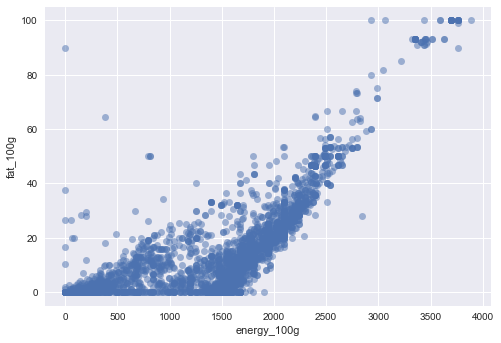

energy_100g versus saturated-fat_100g

P-Value: 3.759811476820783e-265
Pearson: 0.5583222614392492
Cov: 3264.3884372114135

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10542.940540692056


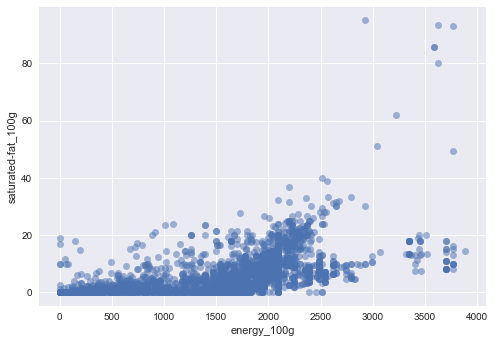

energy_100g versus cholesterol_100g

P-Value: 0.30135846862724913
Pearson: 0.01815708051060628
Cov: 2.9386424192582155

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10621.416084711474
energy_100g versus carbohydrates_100g

P-Value: 4.407765475056694e-166
Pearson: 0.4557959789107595
Cov: 10190.755748309319

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  9968.98746936531


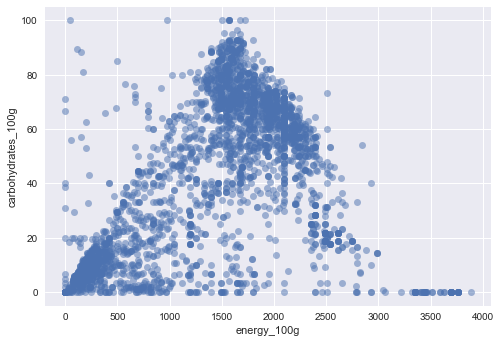

energy_100g versus sugars_100g

P-Value: 6.110091899489274e-52
Pearson: 0.26176829154096565
Cov: 4096.5820893842265

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10331.638716479772
energy_100g versus fiber_100g

P-Value: 1.4636164668738107e-40
Pearson: 0.23109836558100477
Cov: 985.9477919548376

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10561.435609788032
energy_100g versus proteins_100g

P-Value: 1.789889085030404e-48
Pearson: 0.2528661020222668
Cov: 1828.8288419273454

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10495.55214364731
energy_100g versus salt_100g

P-Value: 1.394668157263139e-06
Pearson: -0.08463443909427049
Cov: -226.51475416751222

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10603.118712982205
energy_100g versus nutrition-score-fr_100g

P-Value: 3.9217963857055435e-162
Pearson: 0.4508831973864432
Cov: 2988.148809718467

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10458.699611194452


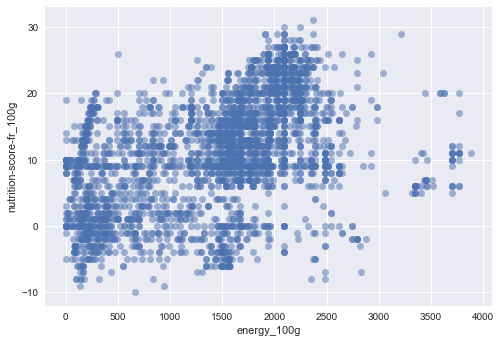

energy_100g versus additives_n

P-Value: 0.09847498010681974
Pearson: 0.029023941238875438
Cov: 59.572241378188856

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10590.832134059758
fat_100g versus energy_100g

P-Value: 0.0
Pearson: 0.7693562212912746
Cov: 11054.106365628571

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10382.000271614086


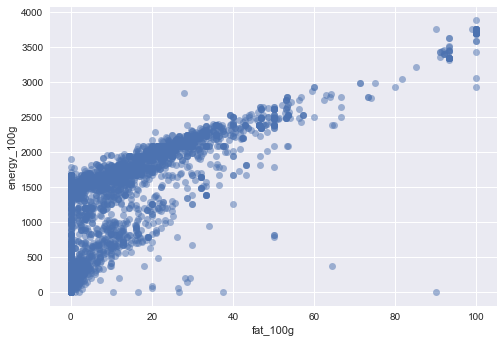

fat_100g versus saturated-fat_100g

P-Value: 0.0
Pearson: 0.6622974412304263
Cov: 89.11946127788394

ANOVA
One way ANOVA p-value:  4.8762377770712303e-194
One way ANOVA stat:  946.0430181213692


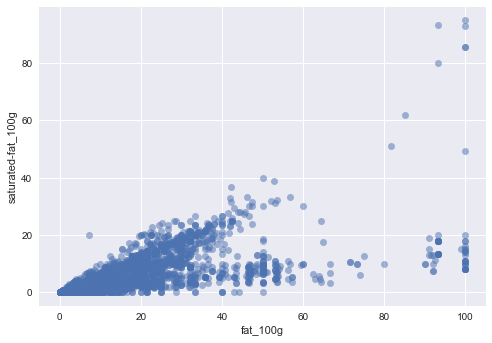

fat_100g versus cholesterol_100g

P-Value: 0.19756719937124698
Pearson: 0.022635724810620247
Cov: 0.08431361656316792

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  2458.3569879512934
fat_100g versus carbohydrates_100g

P-Value: 9.091890626447584e-14
Pearson: -0.13039472111555112
Cov: -67.09628918689309

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  2229.8961772174257
fat_100g versus sugars_100g

P-Value: 0.000670242239685528
Pearson: -0.059709043804739424
Cov: -21.505390283327536

ANOVA
One way ANOVA p-value:  1.149074139474018e-12
One way ANOVA stat:  50.77311709688483
fat_100g versus fiber_100g

P-Value: 1.244096004002291e-05
Pearson: 0.07666097113844322
Cov: 7.527208574284058

ANOVA
One way ANOVA p-value:  2.3995441268144263e-252
One way ANOVA stat:  1259.9212912716166
fat_100g versus proteins_100g

P-Value: 5.0570441007501304e-12
Pearson: 0.12085484100130771
Cov: 20.116345617947008

ANOVA
One way ANOVA p-value:  5.792984820532404e-93
One way ANOVA stat:  432.0996

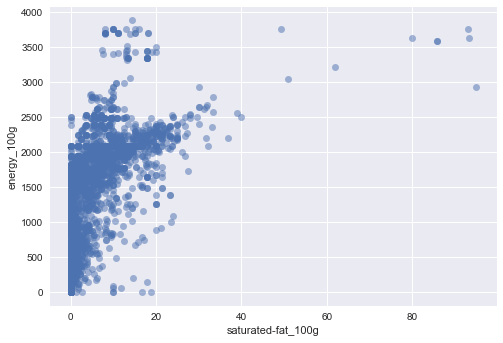

saturated-fat_100g versus fat_100g

P-Value: 0.0
Pearson: 0.6622974412304263
Cov: 89.11946127788394

ANOVA
One way ANOVA p-value:  4.8762377770712303e-194
One way ANOVA stat:  946.043018121369


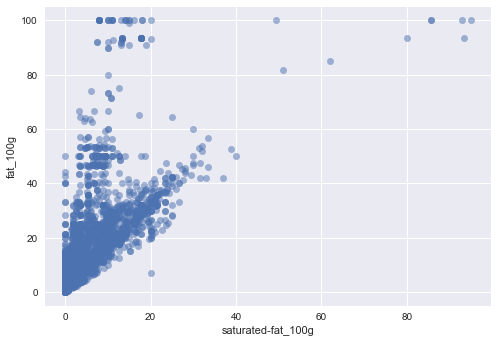

saturated-fat_100g versus cholesterol_100g

P-Value: 0.0011384346214559113
Pearson: 0.057122438536870046
Cov: 0.08658262913753267

ANOVA
One way ANOVA p-value:  3.8379419e-316
One way ANOVA stat:  1618.6353247974696
saturated-fat_100g versus carbohydrates_100g

P-Value: 0.38139314798431895
Pearson: 0.015378297489574555
Cov: 3.2200859746500354

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  5617.676214511421
saturated-fat_100g versus sugars_100g

P-Value: 5.6758845626588884e-21
Pearson: 0.1639626034215006
Cov: 24.03104933674237

ANOVA
One way ANOVA p-value:  2.431946648749954e-280
One way ANOVA stat:  1415.3214139158565
saturated-fat_100g versus fiber_100g

P-Value: 0.34681262366459575
Pearson: 0.016528137228253113
Cov: 0.6603957367499371

ANOVA
One way ANOVA p-value:  3.8342134476224384e-14
One way ANOVA stat:  57.509920815788554
saturated-fat_100g versus proteins_100g

P-Value: 0.24200115618266885
Pearson: 0.020554211226045054
Cov: 1.3922158373579874

ANOVA
One way ANOVA p-val

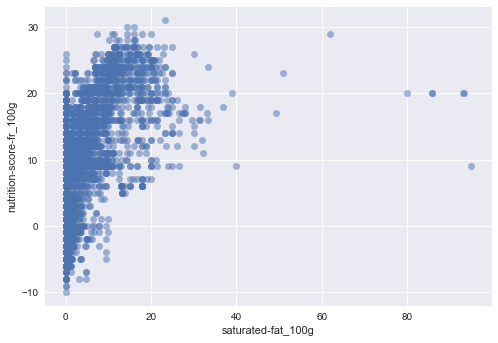

saturated-fat_100g versus additives_n

P-Value: 0.04301884133591004
Pearson: 0.035541257356182104
Cov: 0.6831933785745424

ANOVA
One way ANOVA p-value:  2.9511317148387653e-113
One way ANOVA stat:  532.2945427127601
cholesterol_100g versus energy_100g

P-Value: 0.30135846862724913
Pearson: 0.01815708051060628
Cov: 2.9386424192582155

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10621.41608471148
cholesterol_100g versus fat_100g

P-Value: 0.19756719937124698
Pearson: 0.022635724810620247
Cov: 0.08431361656316792

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  2458.356987951293
cholesterol_100g versus saturated-fat_100g

P-Value: 0.0011384346214559113
Pearson: 0.057122438536870046
Cov: 0.08658262913753267

ANOVA
One way ANOVA p-value:  3.8379419e-316
One way ANOVA stat:  1618.6353247974696
cholesterol_100g versus carbohydrates_100g

P-Value: 0.5068896214984975
Pearson: -0.01166032394407663
Cov: -0.06758552052140834

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat: 

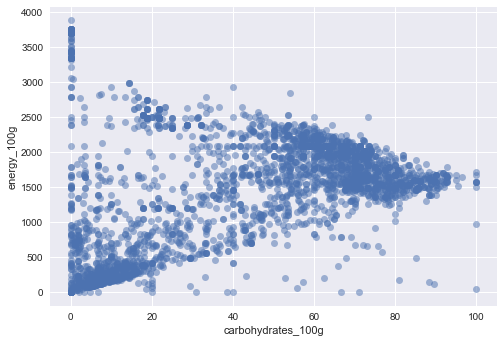

carbohydrates_100g versus fat_100g

P-Value: 9.091890626447584e-14
Pearson: -0.13039472111555112
Cov: -67.09628918689309

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  2229.8961772174266
carbohydrates_100g versus saturated-fat_100g

P-Value: 0.38139314798431895
Pearson: 0.015378297489574555
Cov: 3.2200859746500354

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  5617.6762145114235
carbohydrates_100g versus cholesterol_100g

P-Value: 0.5068896214984975
Pearson: -0.01166032394407663
Cov: -0.06758552052140834

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  7742.986901038947
carbohydrates_100g versus sugars_100g

P-Value: 2.09731e-318
Pearson: 0.6015550354978023
Cov: 337.1493391410281

ANOVA
One way ANOVA p-value:  4.86294e-319
One way ANOVA stat:  1635.3160330182095


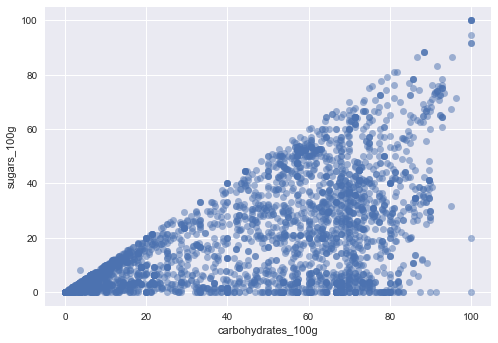

carbohydrates_100g versus fiber_100g

P-Value: 1.6555737725381323e-42
Pearson: 0.23666009279941025
Cov: 36.15966497846722

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  6163.813574587777
carbohydrates_100g versus proteins_100g

P-Value: 0.057048845258436426
Pearson: -0.033424423120964594
Cov: -8.657424077266878

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  4574.681183678333
carbohydrates_100g versus salt_100g

P-Value: 0.002522458748996881
Pearson: -0.05303388040147053
Cov: -5.083292527581347

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  7214.246085923744
carbohydrates_100g versus nutrition-score-fr_100g

P-Value: 4.997165938223734e-82
Pearson: 0.3277106101473996
Cov: 77.78054748686017

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  4007.7511321587717
carbohydrates_100g versus additives_n

P-Value: 3.619206242166368e-34
Pearson: 0.21169948401584304
Cov: 15.56143620840232

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  6974.701139794762
sugar

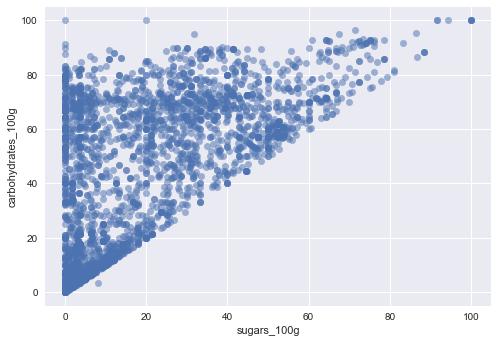

sugars_100g versus fiber_100g

P-Value: 0.00017935267701476632
Pearson: -0.06575231016747839
Cov: -7.032003916434597

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  1774.971480790932
sugars_100g versus proteins_100g

P-Value: 2.01709109307554e-31
Pearson: -0.20274701171367243
Cov: -36.75766821046114

ANOVA
One way ANOVA p-value:  7.151078258845903e-165
One way ANOVA stat:  793.8809173313801
sugars_100g versus salt_100g

P-Value: 2.896201726834405e-09
Pearson: -0.10403394918331578
Cov: -6.979679857100158

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  2596.1462134971634
sugars_100g versus nutrition-score-fr_100g

P-Value: 5.484095236871636e-245
Pearson: 0.5401174197293559
Cov: 89.7299442059132

ANOVA
One way ANOVA p-value:  7.102171567311713e-103
One way ANOVA stat:  480.8516251195969


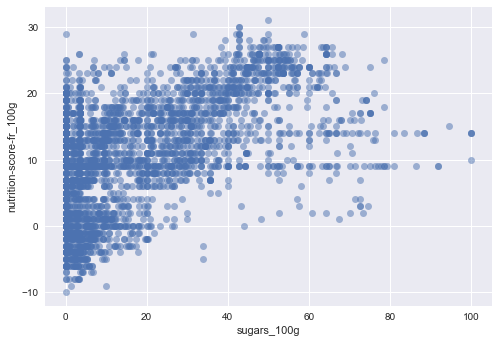

sugars_100g versus additives_n

P-Value: 2.49317300218959e-47
Pearson: 0.24984985741205534
Cov: 12.855166424618215

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  2388.992484327063
fiber_100g versus energy_100g

P-Value: 1.4636164668738107e-40
Pearson: 0.23109836558100477
Cov: 985.9477919548376

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  10561.435609788037
fiber_100g versus fat_100g

P-Value: 1.244096004002291e-05
Pearson: 0.07666097113844322
Cov: 7.527208574284058

ANOVA
One way ANOVA p-value:  2.399544126813335e-252
One way ANOVA stat:  1259.921291271617
fiber_100g versus saturated-fat_100g

P-Value: 0.34681262366459575
Pearson: 0.016528137228253113
Cov: 0.6603957367499371

ANOVA
One way ANOVA p-value:  3.8342134476224384e-14
One way ANOVA stat:  57.509920815788554
fiber_100g versus cholesterol_100g

P-Value: 0.16357450882581445
Pearson: -0.024473369191366154
Cov: -0.027068111096410618

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  1786.0062230616352
fibe

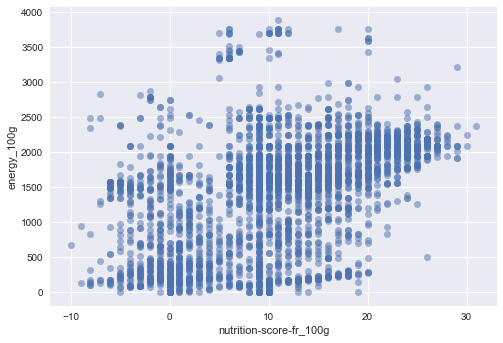

nutrition-score-fr_100g versus fat_100g

P-Value: 6.742627109166595e-69
Pearson: 0.30104312656007376
Cov: 45.91657386618505

ANOVA
One way ANOVA p-value:  8.224541708470596e-44
One way ANOVA stat:  195.59824603089507
nutrition-score-fr_100g versus saturated-fat_100g

P-Value: 8.701583632028972e-208
Pearson: 0.5032908554981854
Cov: 31.237805476862817

ANOVA
One way ANOVA p-value:  2.2426201093405376e-173
One way ANOVA stat:  837.9167447849611


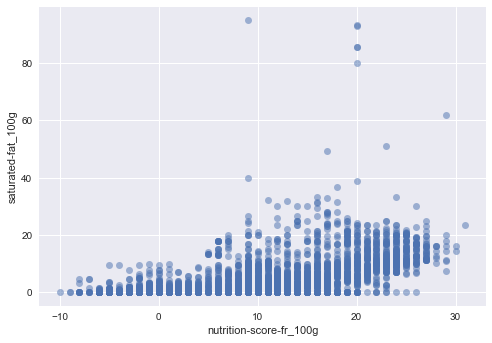

nutrition-score-fr_100g versus cholesterol_100g

P-Value: 0.005824404273644379
Pearson: 0.04841977394958666
Cov: 0.08318941527408193

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  5488.877520639345
nutrition-score-fr_100g versus carbohydrates_100g

P-Value: 4.997165938223734e-82
Pearson: 0.3277106101473996
Cov: 77.78054748686017

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  4007.7511321587704
nutrition-score-fr_100g versus sugars_100g

P-Value: 5.484095236871636e-245
Pearson: 0.5401174197293559
Cov: 89.7299442059132

ANOVA
One way ANOVA p-value:  7.102171567311713e-103
One way ANOVA stat:  480.8516251195969


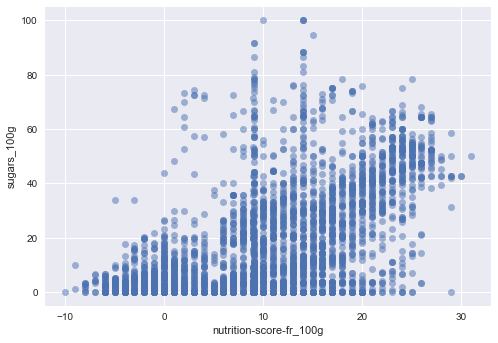

nutrition-score-fr_100g versus fiber_100g

P-Value: 6.130306876902729e-28
Pearson: -0.19074484437431236
Cov: -8.638820358916492

ANOVA
One way ANOVA p-value:  7.194428893271911e-305
One way ANOVA stat:  1554.057835235459
nutrition-score-fr_100g versus proteins_100g

P-Value: 0.00042270956387652133
Pearson: -0.061881854609497376
Cov: -4.751058298775428

ANOVA
One way ANOVA p-value:  1.8982530742235066e-30
One way ANOVA stat:  132.88134473820364
nutrition-score-fr_100g versus salt_100g

P-Value: 3.048066934755334e-06
Pearson: 0.08186920491196563
Cov: 2.3260258545330057

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  3726.160569524169
nutrition-score-fr_100g versus additives_n

P-Value: 3.8111130271558797e-57
Pearson: 0.2745204307179502
Cov: 5.981454674240353

ANOVA
One way ANOVA p-value:  0.0
One way ANOVA stat:  3303.9537590936375
additives_n versus energy_100g

P-Value: 0.09847498010681974
Pearson: 0.029023941238875438
Cov: 59.572241378188856

ANOVA
One way ANOVA p-value:  0.0


In [37]:
# Corr coeff: pearsonr
# if ~1 correlation, otherwise if close to 0: no correlation

import scipy.stats as st

an_vars = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'additives_n']

for an_var_1 in an_vars:
    for an_var_2 in an_vars:
        if an_var_1 != an_var_2:
            print(an_var_1+" versus "+an_var_2+"\n")
            pears_coeff, pVal = st.pearsonr(subset_fr[an_var_1], subset_fr[an_var_2])
            print('P-Value: {}'.format(pVal))
            print('Pearson: {}'.format(pears_coeff))
            print('Cov: {}'.format(np.cov(subset_fr[an_var_1],subset_fr[an_var_2],ddof=0)[1,0]))
            
            stat, p = st.f_oneway(subset_fr[an_var_1], subset_fr[an_var_2])
            print("\nANOVA")
            print("One way ANOVA p-value: ", p)
            print("One way ANOVA stat: ", stat)
            
            if pears_coeff > 0.45:
                plt.plot(subset_fr[an_var_1], subset_fr[an_var_2],'o',alpha=0.5)
                plt.xlabel(an_var_1)
                plt.ylabel(an_var_2)
                plt.show()
                


Eta-squared:  0.14804118338904812


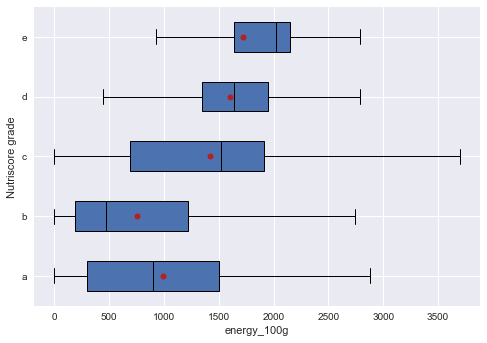

Eta-squared:  0.07464335104097232


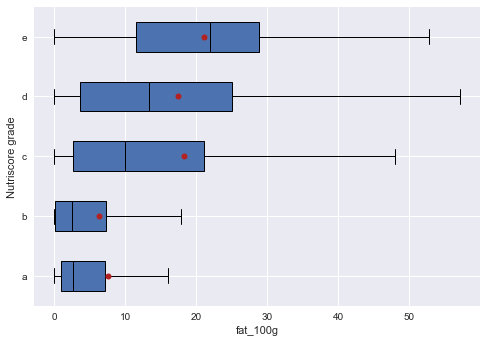

Eta-squared:  0.20581929782465314


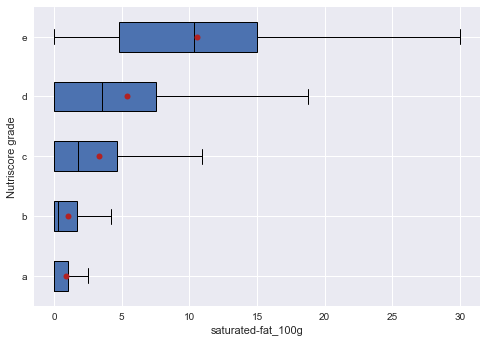

Eta-squared:  0.0016873044734723732


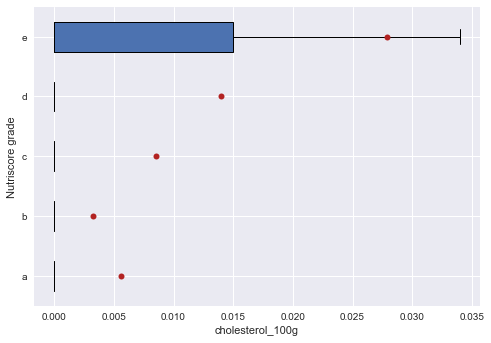

Eta-squared:  0.08235581570381285


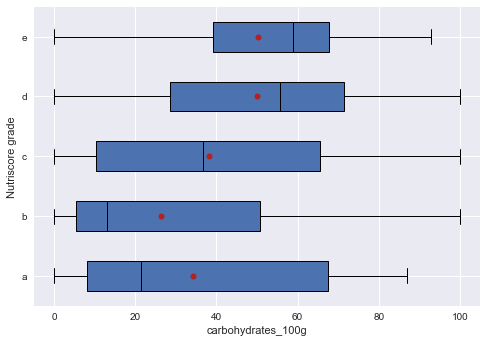

Eta-squared:  0.2305008055281215


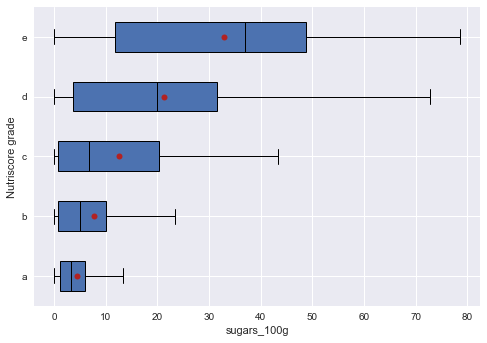

Eta-squared:  0.06574921767366206


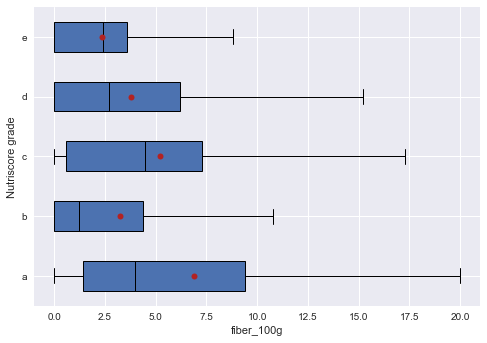

Eta-squared:  0.025743380567513706


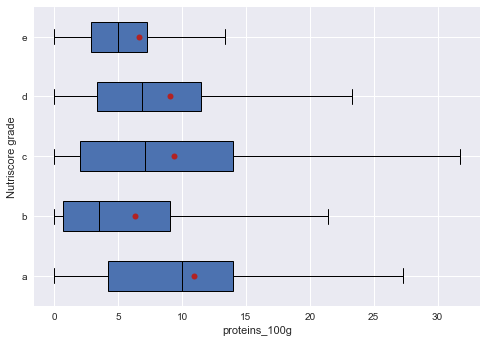

Eta-squared:  0.020591785691334803


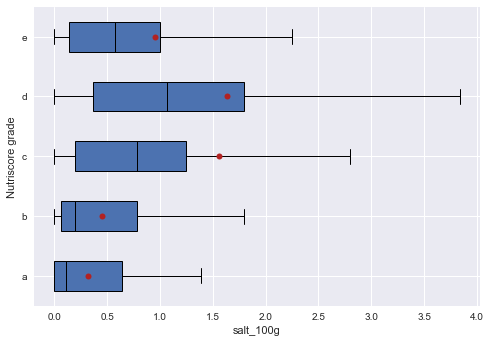

Eta-squared:  0.8915588992322337


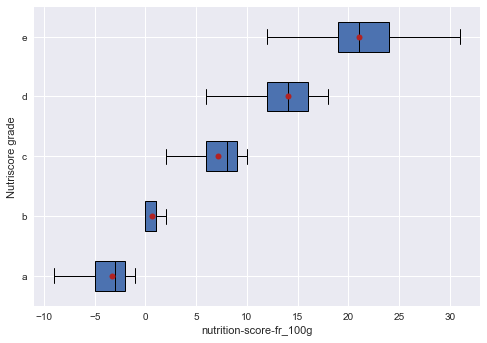

Eta-squared:  0.0673020332153786


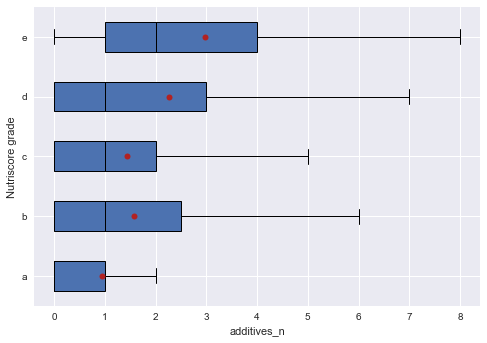

In [33]:
# Nutriscore definition:
# Drawbacks: Energy, saturated fat, sugars, salt
# Assets: Fruits and vegetables proportion, nuts, fibers and proteins

def eta_squared(x,y):
    mean_y = y.mean()
    classes = []
    x_modalities = x.unique()
    x_modalities = x_modalities[pd.notna(x_modalities)]
    x_modalities.sort()
    for classe in x_modalities:
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'mean_classe': yi_classe.mean()})
    SCT = sum([(yj-mean_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['mean_classe']-mean_y)**2 for c in classes])
    return SCE/SCT


X = 'nutriscore_grade'
modalities = subset_fr[X].unique()
modalities = modalities[pd.notna(modalities)]
modalities.sort()

an_vars = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'additives_n']

for Y in an_vars:
    groups = []
    for m in modalities:
        groups.append(subset_fr[subset_fr[X]==m][Y])

    print("Eta-squared: ", eta_squared(subset_fr[X],subset_fr[Y]))
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}

    plt.xlabel(Y)
    plt.ylabel("Nutriscore grade")
    plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()

pnns_groups_1,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,unknown,Total
nutriscore_grade,,,,,,,,,,,
a,14.0,119.0,19.0,22.0,17.0,45.0,36.0,14.0,17.0,59.0,362
b,42.0,60.0,26.0,25.0,8.0,14.0,42.0,10.0,20.0,48.0,295
c,33.0,118.0,35.0,127.0,12.0,11.0,27.0,35.0,70.0,167.0,635
d,30.0,147.0,18.0,109.0,29.0,2.0,34.0,26.0,323.0,246.0,964
e,146.0,8.0,9.0,39.0,2.0,NaN,8.0,9.0,450.0,111.0,782
Total,265.0,452.0,107.0,322.0,68.0,72.0,147.0,94.0,880.0,631.0,3038


pnns_groups_1,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,unknown,Total
nutriscore_grade,,,,,,,,,,,
a,0.005721,0.064808,0.002899,0.003772,0.008117,0.118345,0.016277,0.000815,0.046804,0.001298,0.001065
b,0.009241,0.006030,0.018921,0.000439,0.000370,0.005898,0.042661,0.000170,0.031389,0.001076,0.000868
c,0.004796,0.006831,0.006553,0.045134,0.000091,0.000475,0.000078,0.010409,0.042339,0.010618,0.001869
d,0.021046,0.000823,0.004179,0.001278,0.002656,0.012255,0.001502,0.000095,0.010013,0.012649,0.002837
e,0.073406,0.065199,0.007625,0.013409,0.008808,0.012096,0.014809,0.005743,0.185445,0.007768,0.002301
Total,0.000780,0.001330,0.000315,0.000948,0.000200,0.000212,0.000433,0.000277,0.002590,0.001857,0.008940


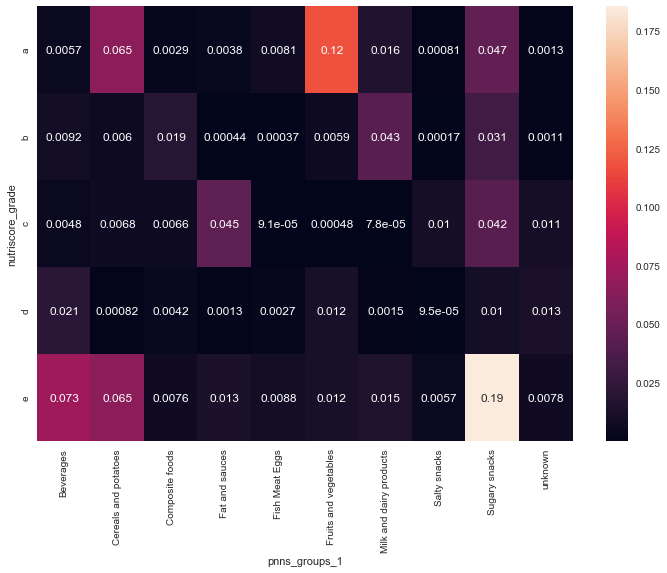

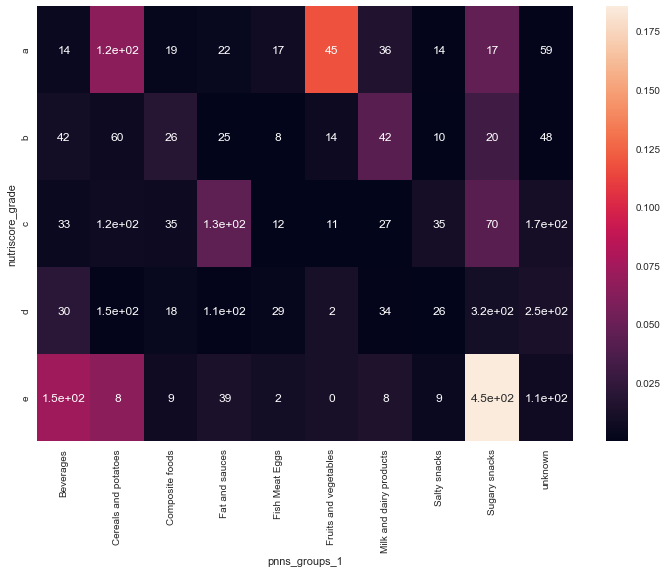

In [22]:
X = "nutriscore_grade"
Y = "pnns_groups_1"

cont = subset_fr[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")
display(cont)

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(subset_fr)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
display(table)

fig = plt.figure(figsize=(12,8))
sns.heatmap(table.iloc[:-1,:-1], annot=table.iloc[:-1,:-1])
plt.show()
fig = plt.figure(figsize=(12,8))
sns.heatmap(table.iloc[:-1,:-1], annot=c.iloc[:-1,:-1])
plt.show()

10
['Fat and sauces' 'Cereals and potatoes' 'unknown' 'Salty snacks'
 'Fruits and vegetables' 'Composite foods' 'Milk and dairy products'
 'Beverages' 'Sugary snacks' 'Fish Meat Eggs']


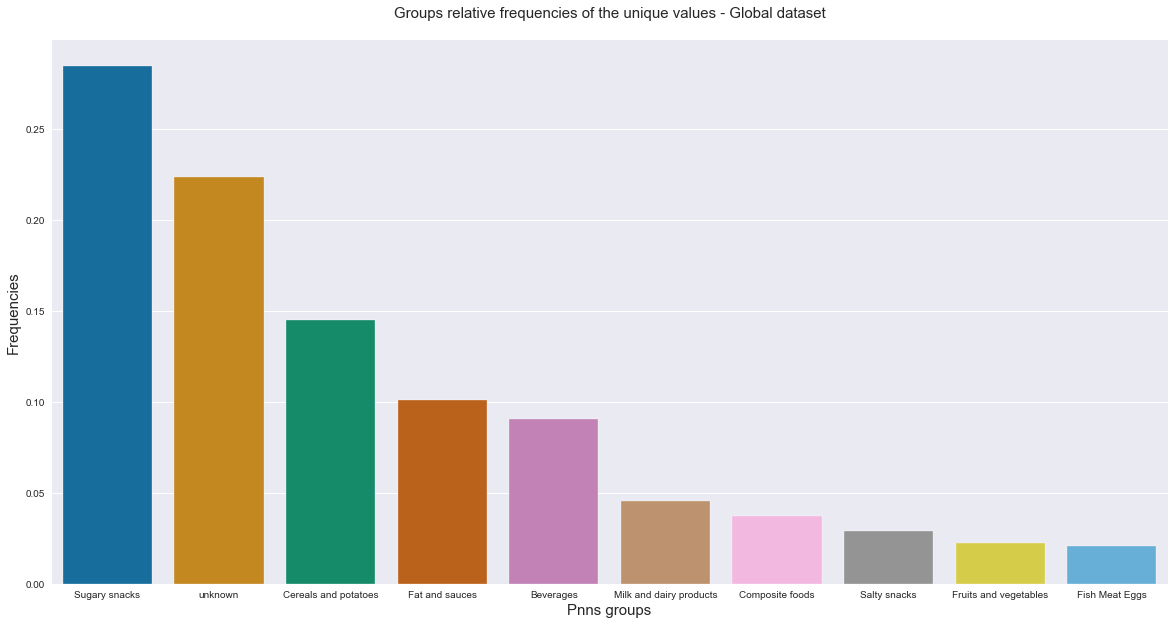

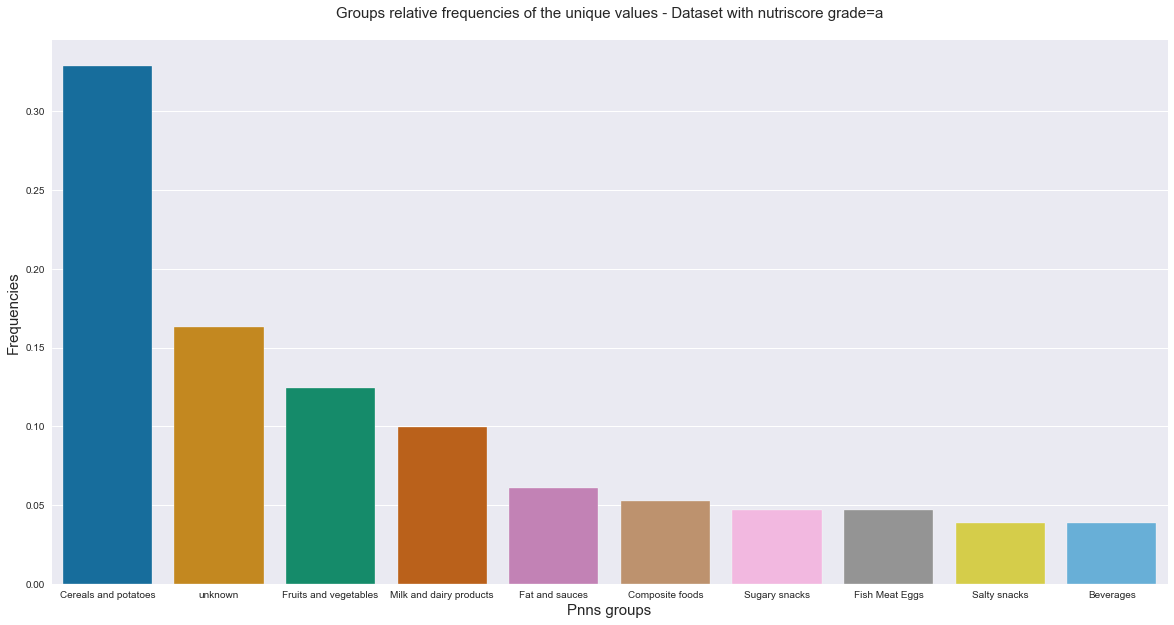

In [23]:
subset_nutri_a = subset_fr[subset_fr['nutriscore_grade']=='a']
print(subset_nutri_a['pnns_groups_1'].nunique())
print(subset_nutri_a['pnns_groups_1'].unique())

groupsCounts = subset_fr['pnns_groups_1'].value_counts(normalize=True)
fig = plt.figure(figsize=(20,10))
sns.barplot(groupsCounts.index, groupsCounts.values, palette='colorblind') # alpha=0.8
plt.title('Groups relative frequencies of the unique values - Global dataset\n', fontsize=15)
plt.ylabel('Frequencies', fontsize=15)
plt.xlabel('Pnns groups', fontsize=15)
plt.show()


groupsCounts = subset_nutri_a['pnns_groups_1'].value_counts(normalize=True)
fig = plt.figure(figsize=(20,10))
sns.barplot(groupsCounts.index, groupsCounts.values, palette='colorblind') # alpha=0.8
plt.title('Groups relative frequencies of the unique values - Dataset with nutriscore grade=a\n', fontsize=15)
plt.ylabel('Frequencies', fontsize=15)
plt.xlabel('Pnns groups', fontsize=15)
plt.show()



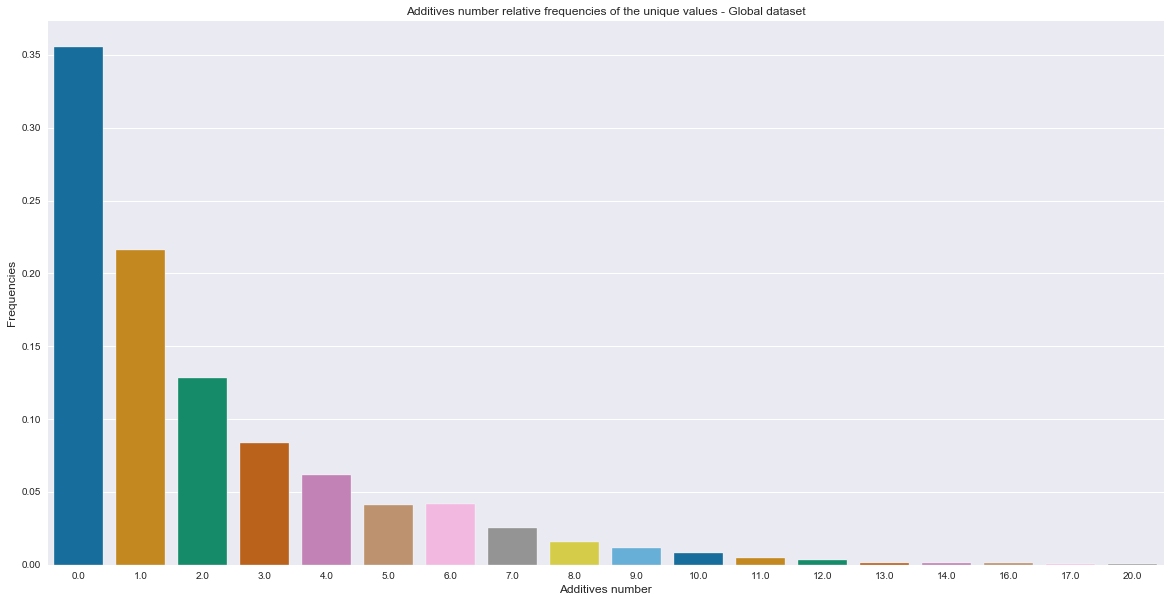

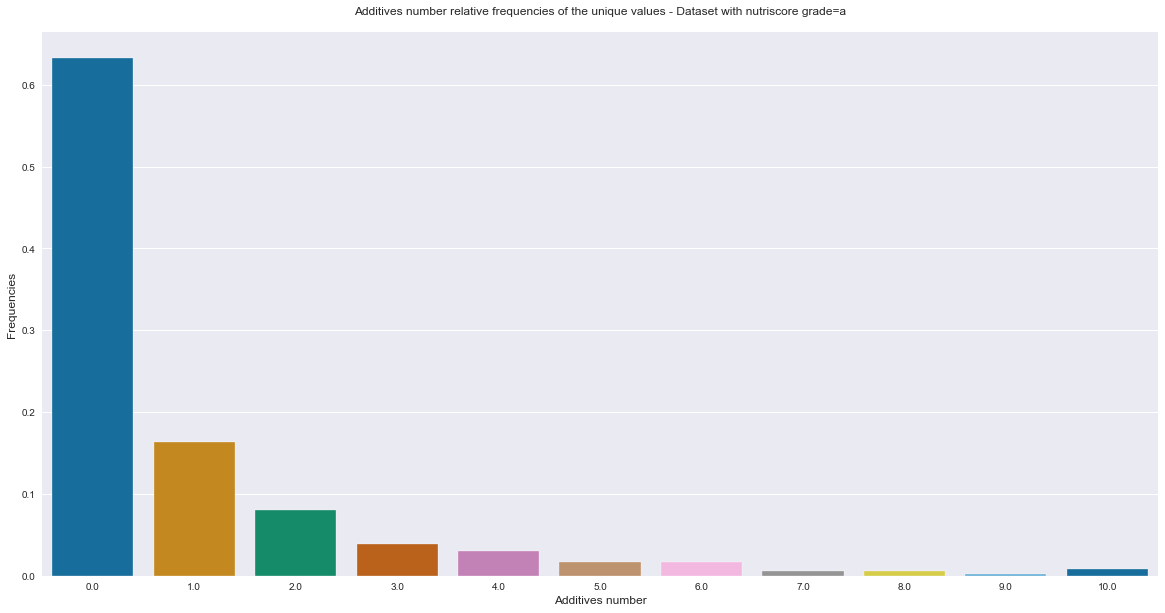

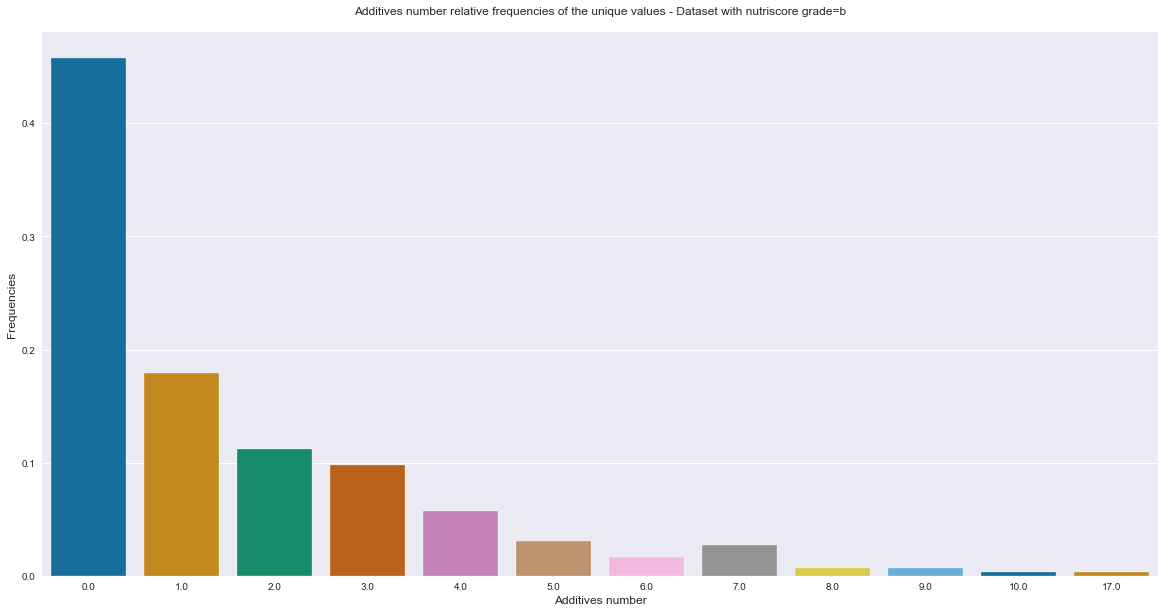

In [24]:
addCounts = subset_fr['additives_n'].value_counts(normalize=True)
fig = plt.figure(figsize=(20,10))
sns.barplot(addCounts.index, addCounts.values, palette='colorblind')
plt.title('Additives number relative frequencies of the unique values - Global dataset')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Additives number', fontsize=12)
plt.show()

subset_nutri_b = subset_fr[subset_fr['nutriscore_grade']=='b']
addCounts = subset_nutri_a['additives_n'].value_counts(normalize=True)
fig = plt.figure(figsize=(20,10))
sns.barplot(addCounts.index, addCounts.values, palette='colorblind')
plt.title('Additives number relative frequencies of the unique values - Dataset with nutriscore grade=a\n')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Additives number', fontsize=12)
plt.show()

addCounts = subset_nutri_b['additives_n'].value_counts(normalize=True)
fig = plt.figure(figsize=(20,10))
sns.barplot(addCounts.index, addCounts.values, palette='colorblind')
plt.title('Additives number relative frequencies of the unique values - Dataset with nutriscore grade=b\n')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Additives number', fontsize=12)
plt.show()

additives_n,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,16.0,17.0,20.0,Total
nutriscore_grade,,,,,,,,,,,,,,,,,,,
a,229.0,59.0,29.0,14.0,11.0,6.0,6.0,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362
b,135.0,53.0,33.0,29.0,17.0,9.0,5.0,8.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,295
c,309.0,123.0,67.0,42.0,38.0,21.0,11.0,10.0,5.0,3.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,635
d,313.0,217.0,122.0,85.0,54.0,48.0,46.0,15.0,19.0,16.0,8.0,11.0,5.0,2.0,1.0,1.0,NaN,1.0,964
e,111.0,202.0,137.0,75.0,62.0,38.0,64.0,42.0,18.0,11.0,9.0,2.0,3.0,2.0,3.0,2.0,1.0,NaN,782
Total,1097.0,654.0,388.0,245.0,182.0,122.0,132.0,77.0,46.0,33.0,24.0,14.0,9.0,5.0,4.0,3.0,2.0,1.0,3038


additives_n,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,16.0,17.0,20.0,Total
nutriscore_grade,,,,,,,,,,,,,,,,,,,
a,0.181006,0.005265,0.009256,0.012745,8.357395e-03,0.008336,0.010127,0.009895,0.003743,0.003823,0.000075,0.003055,0.001964,1.091147e-03,0.000873,0.000655,0.000436,0.000218,0.002989
b,0.024233,0.001392,0.000294,0.003943,2.276832e-05,0.000777,0.007998,0.000275,0.002231,0.000654,0.001254,0.002490,0.001601,8.891940e-04,0.000711,0.000534,0.007186,0.000178,0.002436
c,0.080602,0.000396,0.002081,0.001460,3.033563e-04,0.000686,0.016680,0.003347,0.003488,0.003627,0.001203,0.002163,0.000645,8.523351e-07,0.001531,0.001148,0.000766,0.000383,0.005244
d,0.001042,0.005104,0.000744,0.003960,4.961617e-07,0.007405,0.002269,0.005322,0.004047,0.007626,0.000204,0.021947,0.003944,3.463093e-04,0.000059,0.000026,0.001162,0.003245,0.007961
e,0.174275,0.024258,0.039354,0.008365,1.458500e-02,0.004881,0.063488,0.057751,0.008397,0.002269,0.003481,0.001097,0.000619,1.021515e-03,0.008390,0.004400,0.001085,0.000471,0.006458
Total,0.009059,0.005401,0.003204,0.002023,1.502964e-03,0.001007,0.001090,0.000636,0.000380,0.000273,0.000198,0.000116,0.000074,4.129021e-05,0.000033,0.000025,0.000017,0.000008,0.025088


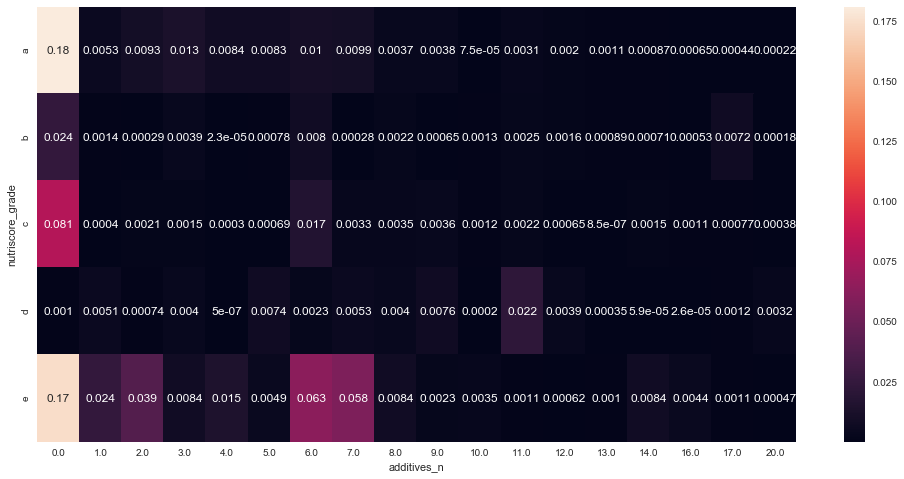

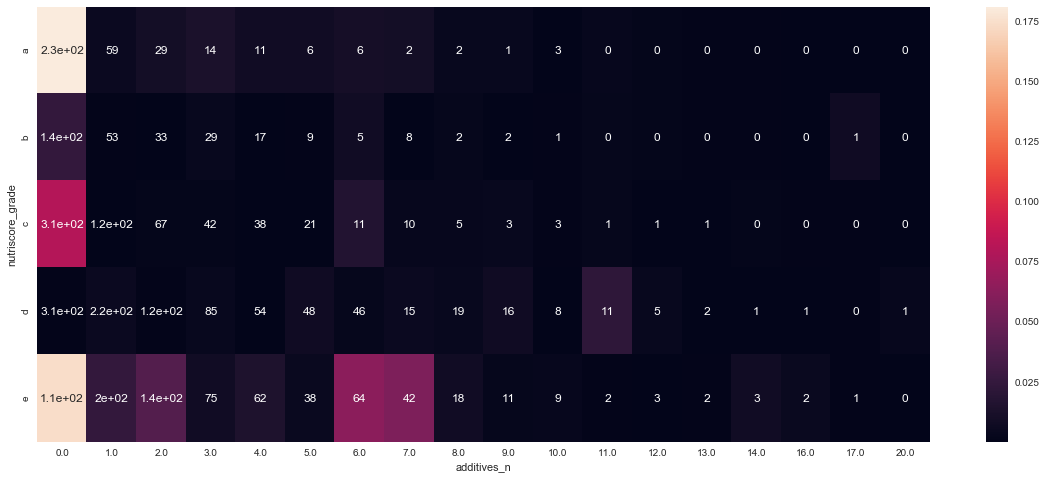

In [25]:
X = "nutriscore_grade"
Y = "additives_n"

cont = subset_fr[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")
display(cont)

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(subset_fr)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
display(table)

fig = plt.figure(figsize=(17,8))
sns.heatmap(table.iloc[:-1,:-1], annot=table.iloc[:-1,:-1])
plt.show()
fig = plt.figure(figsize=(20,8))
sns.heatmap(table.iloc[:-1,:-1], annot=c.iloc[:-1,:-1])
plt.show()

(337, 84)
130


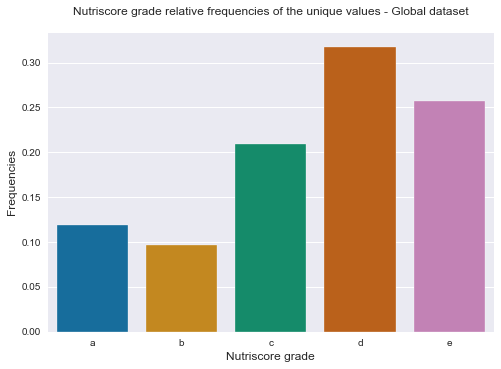

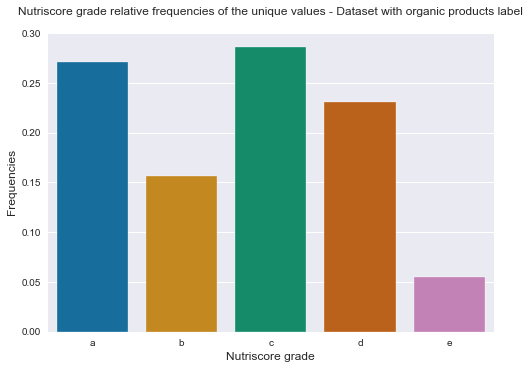

In [26]:
subset_organic = subset_fr[subset_fr['labels_tags'].str.contains("bio", case=False) | subset_fr['labels_tags'].str.contains("organic", case=False)]
print(subset_organic.shape)
print(subset_organic['labels_tags'].nunique())


nutriCounts = subset_fr['nutriscore_grade'].value_counts(normalize=True)
# fig = plt.figure(figsize=(20,10))
sns.barplot(nutriCounts.index, nutriCounts.values, order=nutriCounts.index.sort_values(), palette='colorblind')
plt.title('Nutriscore grade relative frequencies of the unique values - Global dataset\n')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Nutriscore grade', fontsize=12)
plt.show()

nutriCounts = subset_organic['nutriscore_grade'].value_counts(normalize=True)
# fig = plt.figure(figsize=(20,10))
sns.barplot(nutriCounts.index, nutriCounts.values, order=nutriCounts.index.sort_values(), palette='colorblind')
plt.title('Nutriscore grade relative frequencies of the unique values - Dataset with organic products label\n')
plt.ylabel('Frequencies', fontsize=12)
plt.xlabel('Nutriscore grade', fontsize=12)
plt.show()
